## Document 1 EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data = pd.read_csv('DATA/KH_Media_Spend_Tactic_Cleaned.csv')

'''
check for observations that only contain dash as dash indicates aggregation by media channels(TV, radio, broadcast, sponsorship, etc.) 
share of the features of "channel - media name"
'''

def check_dash(series):
    result = []
    for i in series:
        if ('-' in i) == True:
            result.append(i)
    return result

def check_dash_space(series):
    result = []
    for i in series:
        if (' - ' in i) == True:
            result.append(i)
    return result

dash = check_dash(data['Media'])
dash_space = check_dash_space(data['Media'])

data.loc[data['Media'] == 'ABC- TV (GMA)', 'Media'] = 'ABC - TV (GMA)'
dash_space_all = check_dash_space(data['Media'])

data_dash = data.copy()

data_dash['Media'] = data_dash['Media'].str.replace(' - ', '_')

def test(media):
    for count, char in enumerate(media):
        if char == '_':
            return count

test('TV_ABC\GMA')

data_2020 = data.loc[data['Year'] == 2020]

data_2020.loc[data_2020['Media'] == 'OOH - Billups', 'Media'] = 'OOH_ Billups'

def reformat_2020(heading):
    index = heading.find('-')
    if heading[0:index+1] == 'TV -':
        tv = heading.replace('TV - ', 'TV_')
        data_2020.loc[data_2020['Media'] == heading, 'Media'] = tv
    if heading[0:index+1] == 'Digital -':
        digi = heading.replace('Digital - ', 'Digital_')
        data_2020.loc[data_2020['Media'] == heading, 'Media'] = digi
    if heading[0:index+1] == 'Sponsorship -':
        spon = heading.replace('Sponsorship - ', 'Sponsorship_')
        data_2020.loc[data_2020['Media'] == heading, 'Media'] = spon
    if heading[0:index+1] == 'Print -':
        pri = heading.replace('Print - ', 'Print_')
        data_2020.loc[data_2020['Media'] == heading, 'Media'] = pri
    if heading[0:index+1] == 'Radio -':
        radio = heading.replace('Radio - ', 'Radio_')
        data_2020.loc[data_2020['Media'] == heading, 'Media'] = radio
    if heading[0:index+1] == 'KH Digital -':
        kh = heading.replace('KH Digital - ', 'KHDigital_')
        data_2020.loc[data_2020['Media'] == heading, 'Media'] = kh
        
for i in data_2020['Media']:
    reformat_2020(i)
    
    
def cat_2020(col):
    index = col.find('_')
    if col[0:index] == 'TV':
        data_2020.loc[data_2020['Media'] == col, 'Channel'] = 'TV'
    if col[0:index] == 'Digital':
        data_2020.loc[data_2020['Media'] == col, 'Channel'] = 'Digital'
    if col[0:index] == 'Sponsorship':
        data_2020.loc[data_2020['Media'] == col, 'Channel'] =  'Sponsorship'
    if col[0:index] == 'Print':
        data_2020.loc[data_2020['Media'] == col, 'Channel'] = 'Print'
    if col[0:index] == 'Ambassador':
        data_2020.loc[data_2020['Media'] == col, 'Channel'] = 'Sponsorship'
    if col[0:index] == 'KHDigital':
        data_2020.loc[data_2020['Media'] == col, 'Channel'] = 'Digital'
    if col[0:index] == 'Radio':
        data_2020.loc[data_2020['Media'] == col, 'Channel'] = 'Radio'
    if col[0:index] == 'OOH':
        data_2020.loc[data_2020['Media'] == col, 'Channel'] = 'OOH'
        
data_2020['Channel'] = 'New'

for i in data_2020['Media']:
    cat_2020(i)

plot_df_20 = data_2020.groupby(['Channel', 'Week_start']).agg({'Spending': 'sum'}).reset_index()

plot_df_20.head(10)

/Users/kpainton/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/kpainton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Channel,Week_start,Spending
0,Digital,2019-12-30,0.00
1,Digital,2020-01-06,0.00
2,Digital,2020-01-13,0.00
3,Digital,2020-01-20,88331.70
4,Digital,2020-01-27,88331.70
5,Digital,2020-02-03,0.00
6,Digital,2020-02-10,110969.66
7,Digital,2020-02-17,137435.32
8,Digital,2020-02-24,137625.32
9,Digital,2020-03-02,26655.66


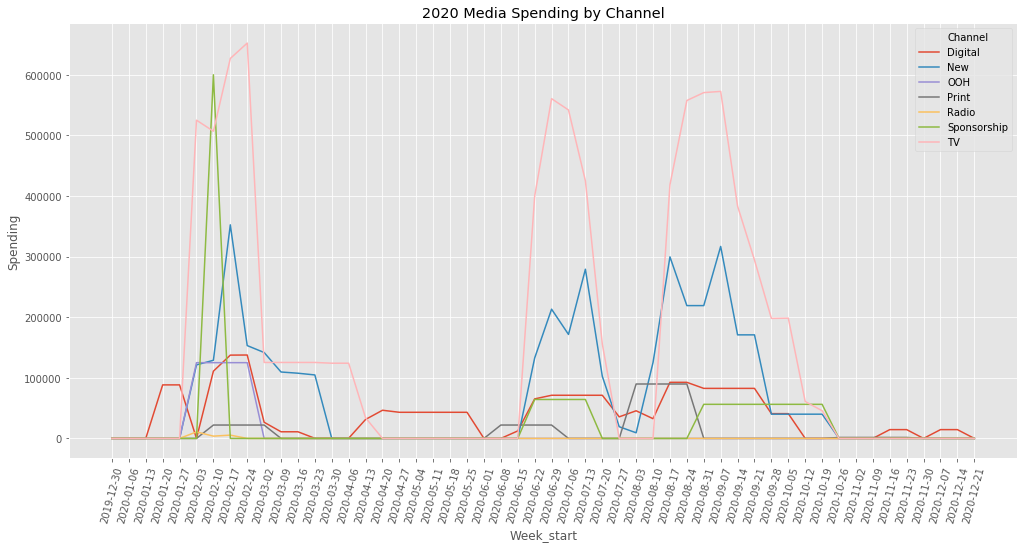

In [3]:
plt.style.use('ggplot')
plt.figure(figsize = (17,8))
plt.xticks(rotation = 75)
plt.title('2020 Media Spending by Channel')

sns.lineplot(data = plot_df_20, x = 'Week_start', y = 'Spending', hue = 'Channel')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

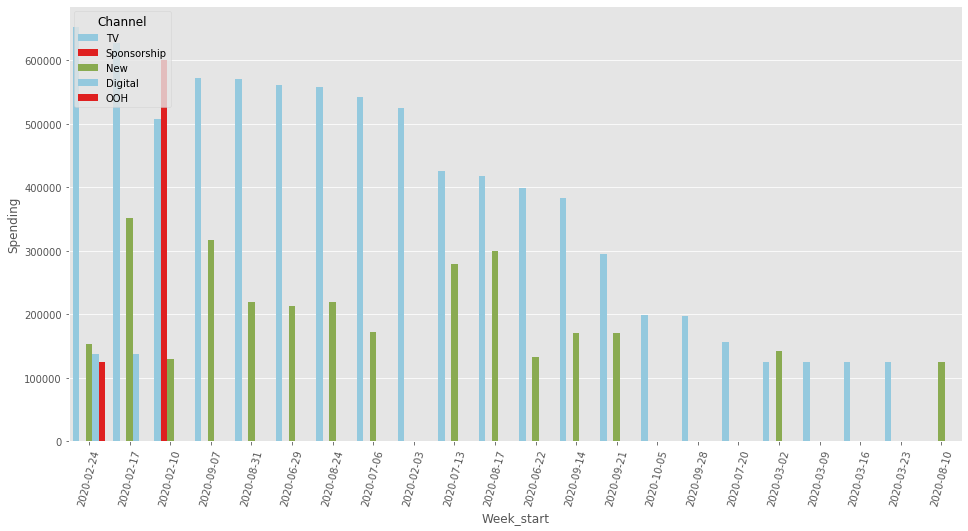

In [4]:
plt.figure(figsize = (16,8))

sns.barplot(data = round(plot_df_20.sort_values(by = 'Spending', ascending = False).head(40),3), 
            x = 'Week_start', y = 'Spending', hue = 'Channel', palette=['skyblue', 'red', 'C12'])
plt.xticks(rotation = 75)

/Users/kpainton/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/kpainton/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


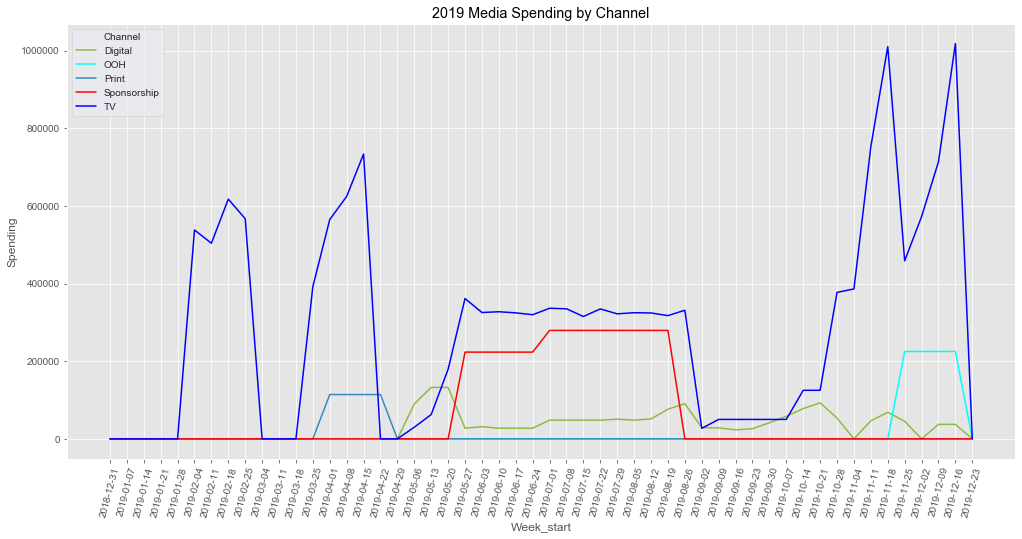

In [5]:
data_2019 = data.loc[data['Year'] == 2019]
# Define functions

def reformat_tv(heading):
    index = heading.find('-')
    tv = 'TV_'+ heading[0:index-1] + ' ' + heading[index+2:]
    data_2019.loc[data_2019['Media'] == heading, 'Media'] = tv

def reformat_digital(heading):
    index = heading.find('-')
    digital = 'Digital_'+ heading[0:index-1] + ' ' + heading[index+2:]
    data_2019.loc[data_2019['Media'] == heading, 'Media'] = digital

'''
def reformat_growth(heading):
    growth = 'Growth_'+ heading
    data_2019.loc[data_2019['Media'] == heading, 'Media'] = growth
'''

reformat_tv('ABC - Media (TV)')

reformat_tv('Lifestyle - Food Network')
reformat_tv('Lifestyle - Cooking Channel')
reformat_tv('Lifestyle - HGTV')
reformat_tv('Lifestyle - DIY')
reformat_tv('Lifestyle - Travel Channel')
reformat_tv('Lifestyle - GAC')

reformat_tv('Tonnage - Fox & Friends')
reformat_tv('Tonnage - Weather Channel')
reformat_tv('Tonnage - Simulmedia')
reformat_tv('Tonnage - Freewheel')
reformat_tv('Addressable Test - Cadent')


reformat_tv('VOD - CBS')
reformat_tv('VOD - NBC')
reformat_tv('VOD - Moasis (Canada)')
reformat_tv('Addressable Test - Cadent')
reformat_tv('NE Heavy Up - Linear TV')

reformat_tv('Production - Discovery Vignettes')
reformat_tv('Production - The Kitchen')
reformat_tv('Production - Weather Channel')

reformat_digital('ABC - Media (Digital)')
reformat_tv('VOD - HULU')
reformat_digital('Summer Digital - Evite')
reformat_digital('Summer Digital - Blis')

reformat_digital('2H Digital Media - Back to School')
reformat_digital('2H Digital Media - Hallowaiian')
reformat_digital('2H Digital Media - Holiday')

reformat_digital('Influencer Central')

data_2019.loc[data_2019['Media'] == 'ABC - SCS Sponsorship', 'Media'] = 'Sponsorship_ABC SCS'
data_2019.loc[data_2019['Media'] == 'Print - FN Magazine', 'Media'] = 'Print_FN Magazine'
data_2019.loc[data_2019['Media'] == '3-Market Local Test (Denver, Toledo, Birmingham)','Media'] = 'TV_3 Market Local Test'
data_2019.loc[data_2019['Media'] == 'Innovation Team (Search)', 'Media'] = 'Digital_Innovation Team (Search)'
data_2019.loc[data_2019['Media'] == 'Innovation Team (Social)', 'Media'] = 'Digital_Innovation Team (Social)'
data_2019.loc[data_2019['Media'] == 'IRI Study', 'Media'] = 'Digital_IRI Study'
data_2019.loc[data_2019['Media'] == 'NE Heavy Up - OOH', 'Media'] = 'OOH_NE Heavy Up'

def cat_2019(col):
    index = col.find('_')
    if col[0:index] == 'TV':
        data_2019.loc[data_2019['Media'] == col, 'Channel'] = 'TV'
    if col[0:index] == 'Digital':
        data_2019.loc[data_2019['Media'] == col, 'Channel'] = 'Digital'
    if col[0:index] == 'Sponsorship':
        data_2019.loc[data_2019['Media'] == col, 'Channel'] = 'Sponsorship'
    if col[0:index] == 'Print':
        data_2019.loc[data_2019['Media'] == col, 'Channel'] = 'Print'
    if col[0:index] == 'Growth':
        data_2019.loc[data_2019['Media'] == col, 'Channel'] = 'Growth'
    if col[0:index] == 'OOH':
        data_2019.loc[data_2019['Media'] == col, 'Channel'] = 'OOH'
        
for i in data_2019['Media']:
    cat_2019(i)
    
plot_df_19 = data_2019.groupby(['Channel', 'Week_start']).agg({'Spending': 'sum'}).reset_index()

plt.figure(figsize = (17,8))
plt.xticks(rotation = 75)
plt.title('2019 Media Spending by Channel')
sns.set_style("darkgrid")

sns.lineplot(data = plot_df_19, x = 'Week_start', y = 'Spending', hue = 'Channel', 
             palette = ['C12', 'cyan', 'C1', 'red', 'blue'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

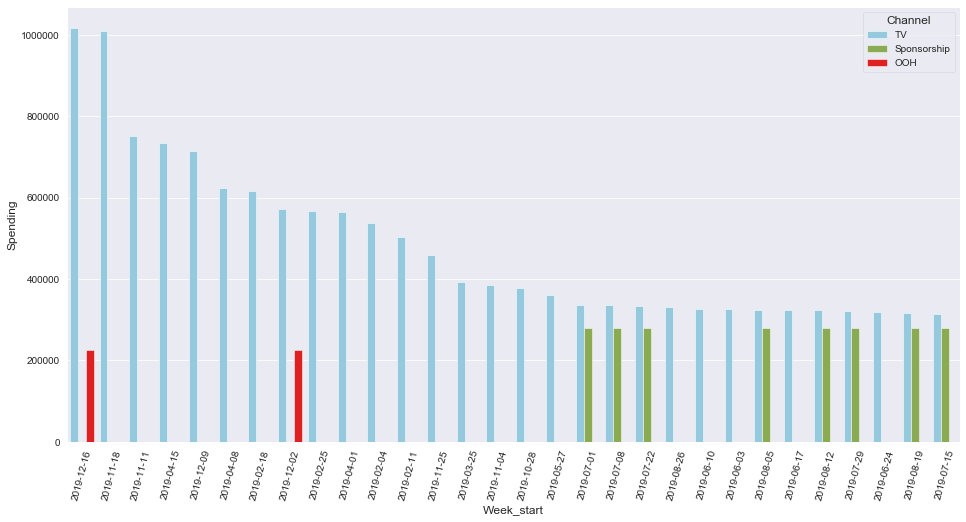

In [6]:
plt.figure(figsize = (16,8))

sns.barplot(data = round(plot_df_19.sort_values(by = 'Spending', ascending = False).head(40),3), 
            x = 'Week_start', y = 'Spending', hue = 'Channel', palette=['skyblue', 'C12', 'red'])
plt.xticks(rotation = 75)

In [7]:
round(data_2019[(data_2019['Week_start'] == '2019-07-08')
        & (data_2019['Spending']> 0)].sort_values(by = 'Spending', ascending = False).\
        reset_index(drop = True)).head(8)

,Media,Tactic,Week_start,Year,Quarter,Month,Week,Spending,Channel
0,Sponsorship_ABC SCS,SPONSORSHIP,2019-07-08,2019,3,7,28,279167.0,Sponsorship
1,TV_Tonnage Simulmedia,TV,2019-07-08,2019,3,7,28,82560.0,TV
2,TV_Tonnage Freewheel,TV,2019-07-08,2019,3,7,28,60833.0,TV
3,TV_Lifestyle Food Network,TV,2019-07-08,2019,3,7,28,44258.0,TV
4,Digital_ABC Media (Digital),DIGITAL,2019-07-08,2019,3,7,28,43333.0,Digital
5,TV_ABC Media (TV),TV,2019-07-08,2019,3,7,28,36380.0,TV
6,TV_Lifestyle HGTV,TV,2019-07-08,2019,3,7,28,34422.0,TV
7,TV_Lifestyle Cooking Channel,TV,2019-07-08,2019,3,7,28,16067.0,TV


In [8]:
round(data_2019[(data_2019['Week_start'] == '2019-07-22')
        & (data_2019['Spending']> 0)].sort_values(by = 'Spending', ascending = False).\
        reset_index(drop = True)).head(8)

,Media,Tactic,Week_start,Year,Quarter,Month,Week,Spending,Channel
0,Sponsorship_ABC SCS,SPONSORSHIP,2019-07-22,2019,3,7,30,279167.0,Sponsorship
1,TV_Tonnage Simulmedia,TV,2019-07-22,2019,3,7,30,83421.0,TV
2,TV_Tonnage Freewheel,TV,2019-07-22,2019,3,7,30,60833.0,TV
3,TV_Lifestyle Food Network,TV,2019-07-22,2019,3,7,30,44650.0,TV
4,Digital_ABC Media (Digital),DIGITAL,2019-07-22,2019,3,7,30,43333.0,Digital
5,TV_ABC Media (TV),TV,2019-07-22,2019,3,7,30,36380.0,TV
6,TV_Lifestyle HGTV,TV,2019-07-22,2019,3,7,30,33325.0,TV
7,TV_Lifestyle Cooking Channel,TV,2019-07-22,2019,3,7,30,15931.0,TV


In [9]:
round(data_2019[(data_2019['Week_start'] == '2019-12-16')
        & (data_2019['Spending']> 0)].sort_values(by = 'Spending', ascending = False).\
        reset_index(drop = True)).head(10)

,Media,Tactic,Week_start,Year,Quarter,Month,Week,Spending,Channel
0,TV_NE Heavy Up Linear TV,TV,2019-12-16,2019,4,12,51,258450.0,TV
1,OOH_NE Heavy Up,BILLBOARD,2019-12-16,2019,4,12,51,225000.0,OOH
2,TV_ABC Media (TV),TV,2019-12-16,2019,4,12,51,210000.0,TV
3,TV_Tonnage Simulmedia,TV,2019-12-16,2019,4,12,51,186657.0,TV
4,TV_Tonnage Freewheel,TV,2019-12-16,2019,4,12,51,96667.0,TV
5,TV_Lifestyle Food Network,TV,2019-12-16,2019,4,12,51,70956.0,TV
6,TV_Lifestyle HGTV,TV,2019-12-16,2019,4,12,51,53958.0,TV
7,Digital_2H Digital Media Holiday,DIGITAL,2019-12-16,2019,4,12,51,37250.0,Digital
8,TV_Lifestyle Cooking Channel,TV,2019-12-16,2019,4,12,51,25213.0,TV
9,TV_Lifestyle Travel Channel,TV,2019-12-16,2019,4,12,51,23293.0,TV


In [10]:
round(data_2019[(data_2019['Week_start'] == '2019-11-18')
        & (data_2019['Spending']> 0)].sort_values(by = 'Spending', ascending = False).\
        reset_index(drop = True)).head(10)

,Media,Tactic,Week_start,Year,Quarter,Month,Week,Spending,Channel
0,TV_ABC Media (TV),TV,2019-11-18,2019,4,11,47,230000.0,TV
1,TV_NE Heavy Up Linear TV,TV,2019-11-18,2019,4,11,47,200000.0,TV
2,TV_Tonnage Simulmedia,TV,2019-11-18,2019,4,11,47,129224.0,TV
3,TV_Addressable Test Cadent,TV,2019-11-18,2019,4,11,47,125000.0,TV
4,TV_Tonnage Freewheel,TV,2019-11-18,2019,4,11,47,80000.0,TV
5,TV_Lifestyle Food Network,TV,2019-11-18,2019,4,11,47,55486.0,TV
6,Digital_2H Digital Media Holiday,DIGITAL,2019-11-18,2019,4,11,47,50000.0,Digital
7,TV_Lifestyle HGTV,TV,2019-11-18,2019,4,11,47,42342.0,TV
8,TV_VOD CBS,VOD,2019-11-18,2019,4,11,47,24000.0,TV
9,TV_Lifestyle Cooking Channel,TV,2019-11-18,2019,4,11,47,20288.0,TV


/Users/kpainton/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/kpainton/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


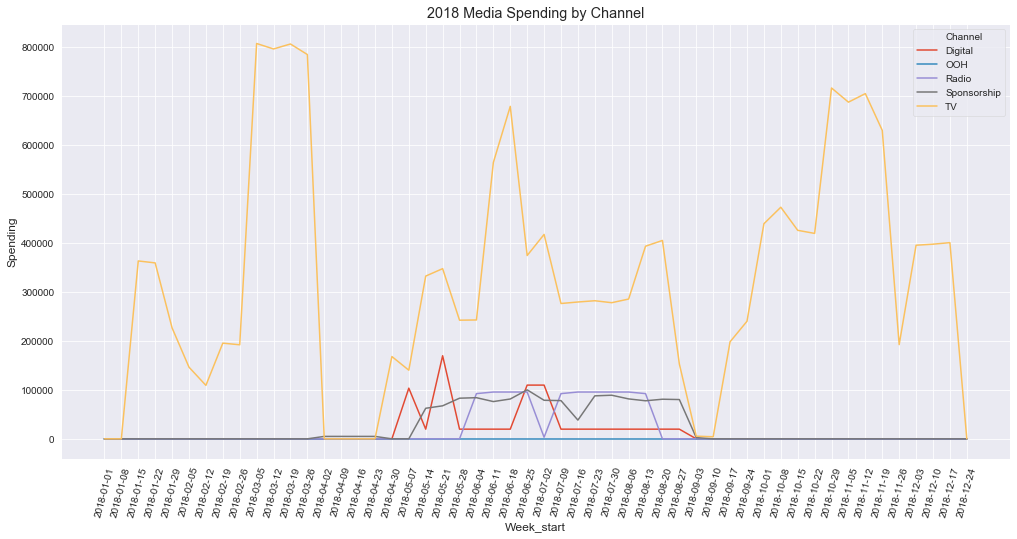

In [11]:
# Year 2018 data

data_2018 = data.loc[data['Year'] == 2018]

def reformat_tv(heading):
    index = heading.find('-')
    tv = 'TV_'+ heading[0:index-1] + ' ' + heading[index+2:]
    data_2018.loc[data_2018['Media'] == heading, 'Media'] = tv

def reformat_digital(heading):
    index = heading.find('-')
    digital = 'Digital_'+ heading[0:index-1] + ' ' + heading[index+2:]
    data_2018.loc[data_2018['Media'] == heading, 'Media'] = digital

reformat_tv('ABC - SCS Sponsorship')
reformat_tv('ABC - Media (TV)')
reformat_tv('Tonnage - Weather Channel')
reformat_tv('Tonnage - Simulmedia')
reformat_tv('Tonnage - Simumedia Matchback')
reformat_tv('Tonnage - AudienceXpress')
reformat_tv('Tonnage - Fox & Friends')
reformat_tv('Tonnage - Weather Channel')
reformat_tv('Tonnage - Hallmark')

reformat_tv('Scripps - Food Network')
reformat_tv('Scripps - Cooking Channel')
reformat_tv('Scripps - HGTV')
reformat_tv('Scripps - DIY')
reformat_tv('Scripps - Travel')
reformat_tv('Scripps - GAC')
reformat_tv('VOD - CBS')
reformat_tv('VOD - NBC')
reformat_tv('ATT - Direct TV')

reformat_digital('ABC - Media (Digital)')
reformat_tv('VOD - HULU')
reformat_digital('Hallowaiian - NCM')
reformat_digital('Summer Digital - Blis')

data_2018.loc[data_2018['Media'] == 'Baseball', 'Media'] = 'Sponsorship_Baseball'
data_2018.loc[data_2018['Media'] == 'CFB - FS1', 'Media'] = 'Sponsorship_CFB FS1'
data_2018.loc[data_2018['Media'] == 'CFB - FSGO', 'Media'] = 'Sponsorship_CFB FSGO'

data_2018.loc[data_2018['Media'] == 'Hallowaiian - Food Network Magazine', 'Media'] = 'Print_Hallowaiian Food Network Magazine'
data_2018.loc[data_2018['Media'] == 'Local Radio - "Best Block Party Ever"', 'Media'] = 'Radio_"Best Block Party Ever"'

data_2018.loc[data_2018['Media'] == 'NE Q4 Heavy Up \\ OOH', 'Media'] = 'OOH_NE Q4 Heavy Up'
data_2018.loc[data_2018['Media'] == 'NE Q4 Heavy Up \\ Radio', 'Media'] = 'Radio_NE Q4 Heavy Up'
data_2018.loc[data_2018['Media'] == 'NE Q4 Heavy Up \\ TV', 'Media'] = 'TV_NE Q4 Heavy Up \\ TV'

data_2018.loc[data_2018['Media'] == 'Production Fee - HGTV', 'Media'] = 'TV_Production Fee HGTV'
data_2018.loc[data_2018['Media'] == 'Production Fee - Scott Conant', 'Media'] = 'TV_Production Fee Scott Conant'
data_2018.loc[data_2018['Media'] == 'Production Fee - Scripps "KITCHEN"', 'Media'] = 'TV_Production Fee Scripps "KITCHEN"'
data_2018.loc[data_2018['Media'] == 'Production Fee - Scripps SOBE', 'Media'] = 'TV_Production Fee Scripps SOBE'
data_2018.loc[data_2018['Media'] == 'Production Fee - Weather Channel', 'Media'] = 'TV_Production Fee Weather Channel'

data_2018.loc[data_2018['Media'] == 'Yankees \\KH Grill', 'Media'] = 'Sponsorship_Yankees\\KH Grill'

def cat_2018(col):
    index = col.find('_')
    if col[0:index] == 'TV':
        data_2018.loc[data_2018['Media'] == col, 'Channel'] = 'TV'
    if col[0:index] == 'Digital':
        data_2018.loc[data_2018['Media'] == col, 'Channel'] = 'Digital'
    if col[0:index] == 'Sponsorship':
        data_2018.loc[data_2018['Media'] == col, 'Channel'] = 'Sponsorship'
    if col[0:index] == 'Print':
        data_2018.loc[data_2018['Media'] == col, 'Channel'] = 'Print'
    if col[0:index] == 'Radio':
        data_2018.loc[data_2018['Media'] == col, 'Channel'] = 'Radio'
    if col[0:index] == 'OOH':
        data_2018.loc[data_2018['Media'] == col, 'Channel'] = 'OOH'
        
for i in data_2018['Media']:
    cat_2018(i)
    
plot_df_18 = data_2018.groupby(['Channel', 'Week_start']).agg({'Spending': 'sum'}).reset_index()

plt.figure(figsize = (17,8))
plt.xticks(rotation = 75)
plt.title('2018 Media Spending by Channel')
sns.set_style("darkgrid")

sns.lineplot(data = plot_df_18, x = 'Week_start', y = 'Spending', hue = 'Channel')

In [12]:
round(plot_df_18.sort_values(by = 'Spending', ascending = False).head(10),2)

,Channel,Week_start,Spending
217,TV,2018-03-05,807733.19
219,TV,2018-03-19,806721.79
218,TV,2018-03-12,796573.92
220,TV,2018-03-26,785189.86
251,TV,2018-10-29,716853.28
253,TV,2018-11-12,705347.99
252,TV,2018-11-05,687861.85
232,TV,2018-06-18,679261.04
254,TV,2018-11-19,630194.67
231,TV,2018-06-11,564616.31


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

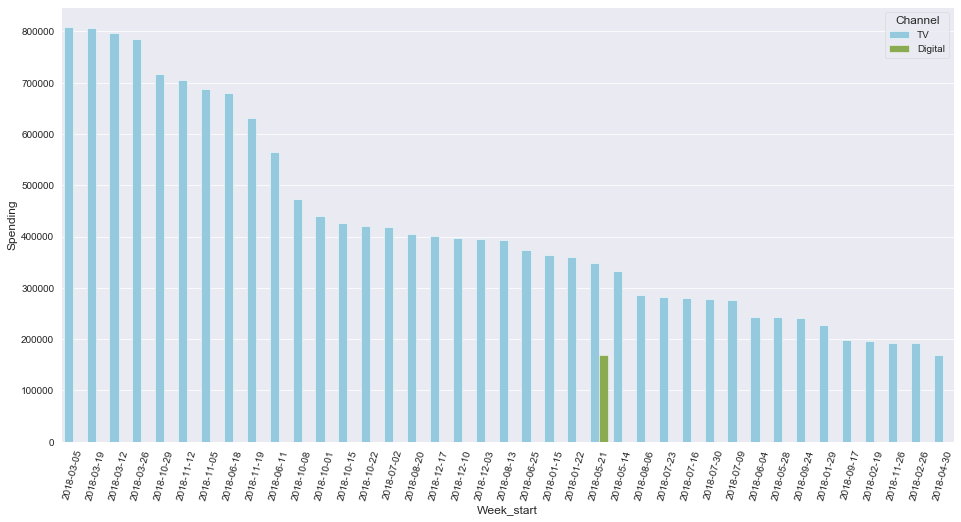

In [13]:
plt.figure(figsize = (16,8))

sns.barplot(data = round(plot_df_18.sort_values(by = 'Spending', ascending = False).head(40),3), 
            x = 'Week_start', y = 'Spending', hue = 'Channel', palette=['skyblue', 'C12', 'red', 'k'])

plt.xticks(rotation = 75)

In [14]:
round(data_2018[(data_2018['Week_start'] == '2018-03-05')
        & (data_2018['Spending']> 0)].sort_values(by = 'Spending', ascending = False).\
        reset_index(drop = True)).head(10)

,Media,Tactic,Week_start,Year,Quarter,Month,Week,Spending,Channel
0,TV_ABC Media (TV),TV,2018-03-05,2018,1,3,10,109905.0,TV
1,TV_Scripps Food Network,TV,2018-03-05,2018,1,3,10,105037.0,TV
2,TV_Tonnage AudienceXpress,TV,2018-03-05,2018,1,3,10,97218.0,TV
3,TV_Tonnage Simulmedia,TV,2018-03-05,2018,1,3,10,96700.0,TV
4,TV_Tonnage Simumedia Matchback,TV,2018-03-05,2018,1,3,10,83100.0,TV
5,TV_Scripps HGTV,TV,2018-03-05,2018,1,3,10,79722.0,TV
6,TV_Scripps Travel,TV,2018-03-05,2018,1,3,10,75621.0,TV
7,TV_Scripps Cooking Channel,TV,2018-03-05,2018,1,3,10,37698.0,TV
8,TV_VOD CBS,VOD,2018-03-05,2018,1,3,10,24864.0,TV
9,TV_VOD NBC,VOD,2018-03-05,2018,1,3,10,24864.0,TV


In [15]:
round(data_2018[(data_2018['Week_start'] == '2018-03-19')
        & (data_2018['Spending']> 0)].sort_values(by = 'Spending', ascending = False).\
        reset_index(drop = True)).head(10)

,Media,Tactic,Week_start,Year,Quarter,Month,Week,Spending,Channel
0,TV_ABC Media (TV),TV,2018-03-19,2018,1,3,12,110160.0,TV
1,TV_Scripps Food Network,TV,2018-03-19,2018,1,3,12,104860.0,TV
2,TV_Tonnage AudienceXpress,TV,2018-03-19,2018,1,3,12,97216.0,TV
3,TV_Tonnage Simulmedia,TV,2018-03-19,2018,1,3,12,93384.0,TV
4,TV_Tonnage Simumedia Matchback,TV,2018-03-19,2018,1,3,12,84050.0,TV
5,TV_Scripps HGTV,TV,2018-03-19,2018,1,3,12,79307.0,TV
6,TV_Scripps Travel,TV,2018-03-19,2018,1,3,12,75621.0,TV
7,TV_Scripps Cooking Channel,TV,2018-03-19,2018,1,3,12,37841.0,TV
8,TV_VOD CBS,VOD,2018-03-19,2018,1,3,12,24864.0,TV
9,TV_VOD NBC,VOD,2018-03-19,2018,1,3,12,24864.0,TV


In [16]:
pd.options.display.float_format = '{:.2f}'.format
data_spend = data.loc[data['Spending'] != 0]
data_spend.groupby('Year')['Spending'].sum()

Year
2016   17545233.00
2017   20006341.06
2018   19956189.12
2019   21600826.71
2020   16713979.39
Name: Spending, dtype: float64

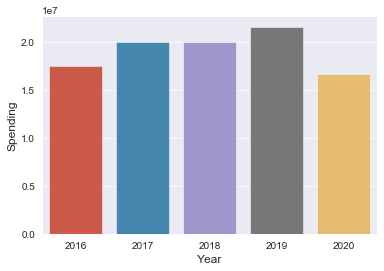

In [17]:
by_year = data_spend.groupby('Year').agg({'Spending':sum}).reset_index()

sns.barplot(x = 'Year', y = 'Spending', data = by_year)

In [18]:
data_spend.groupby('Quarter')['Spending'].sum()

Quarter
1   25392436.54
2   23279729.04
3   25981638.52
4   21168765.18
Name: Spending, dtype: float64

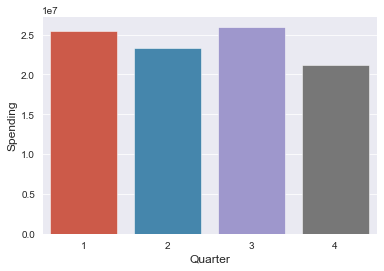

In [19]:
by_quar = data_spend.groupby('Quarter').agg({'Spending':sum}).reset_index()

sns.barplot(x = 'Quarter', y = 'Spending', data = by_quar)

In [20]:
data.groupby('Month')['Spending'].sum()

Month
1     5349088.11
2    12989997.64
3     7392522.45
4     5176140.36
5     9609930.69
6    11363989.94
7     9339998.93
8     8612326.11
9     6328152.15
10    7523827.53
11    7605772.90
12    4530822.46
Name: Spending, dtype: float64

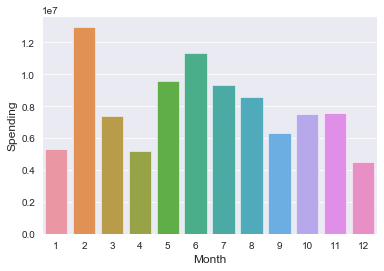

In [21]:
by_mon = data_spend.groupby('Month').agg({'Spending':sum}).reset_index()

sns.barplot(x = 'Month', y = 'Spending', data = by_mon)

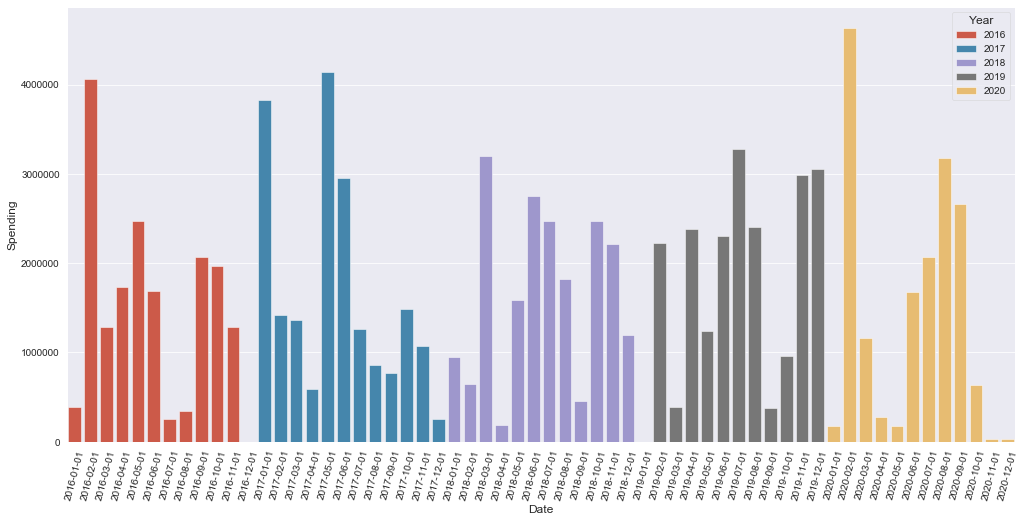

In [22]:
df = data.groupby(['Year', 'Month']).agg({'Spending': 'sum'}).reset_index()
Date = []
for y, m in zip(df.Year, df.Month):
    Date.append(datetime.date(y, m, 1))

df['Date'] = Date

plt.figure(figsize = (17,8))
plt.xticks(rotation = 75)
sns.barplot(data = df, x = 'Date', y = 'Spending', hue='Year', dodge=False)

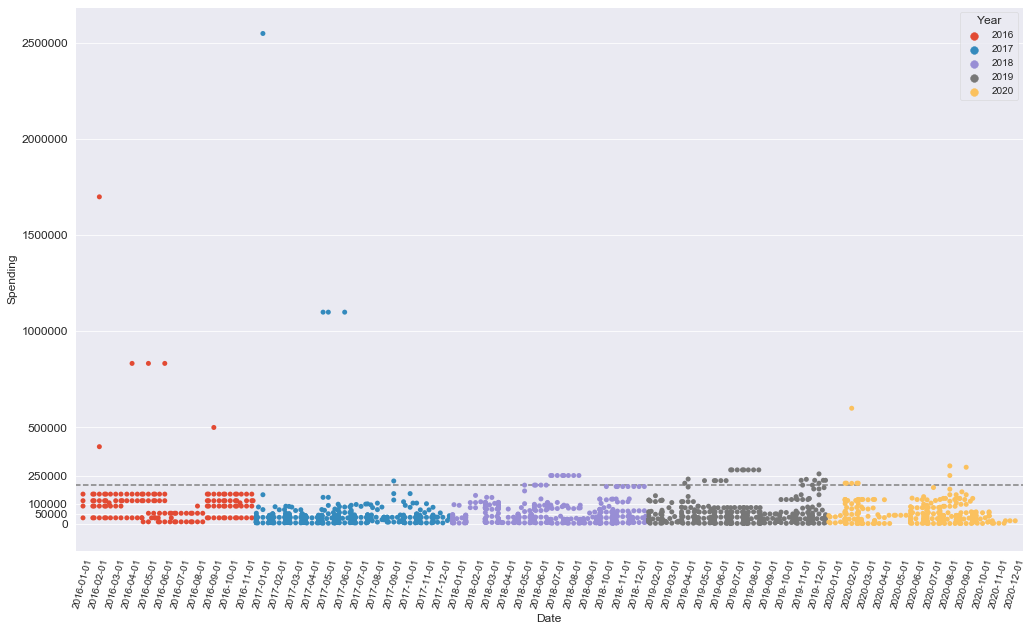

In [23]:
data_mon = data_spend.copy()

Date = []
for y, m in zip(data_mon.Year, data_mon.Month):
    Date.append(datetime.date(y, m, 1))

data_mon['Date'] = Date

data_mon = data_mon.sort_values(by = 'Date', ascending = True)

plt.figure(figsize = (17,10))
plt.xticks(rotation = 75)
plt.yticks([0, 50000, 100000, 250000, 500000, 1000000, 1500000, 2000000, 2500000], fontsize = 12)
plt.axhline(y=200000, color='grey', linestyle='--')
sns.swarmplot(data=data_mon, x='Date', y='Spending', hue='Year')

In [24]:
data.groupby('Media').agg({'Spending' : sum}).sort_values(by = 'Spending', ascending = False).reset_index()

,Media,Spending
0,ABC - SCS Sponsorship,6350000.28
1,Tonnage - Simulmedia,5722940.00
2,ABC - Media (TV),5000000.75
3,Scripps TV Media,4750000.00
4,"""A25-54 w/ Kids"" TV Media",3684555.00
...,...,...
124,Scripps - Digital,0.00
125,NE Q4 Heavy Up \ OOH,0.00
126,ABC - SCS (Local),0.00
127,NE Q4 Heavy Up \ Radio,0.00


In [25]:
media_rank = data.groupby('Media').agg({'Spending' : sum}).\
                           sort_values(by = 'Spending', ascending = False).\
                           reset_index()
sum(media_rank['Spending']!=0)
media_rank.loc[media_rank['Spending'] == 0]

,Media,Spending
122,CFB - FSGO,0.00
123,CFB - FS1,0.00
124,Scripps - Digital,0.00
125,NE Q4 Heavy Up \ OOH,0.00
126,ABC - SCS (Local),0.00
127,NE Q4 Heavy Up \ Radio,0.00
128,Scripps - Magazine,0.00


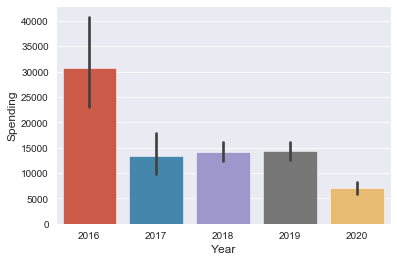

In [26]:
sns.barplot(x='Year', y='Spending', data = data)

## Document 2 EDA

In [27]:
con = pd.read_csv('DATA/2.clean_consumption.csv',parse_dates = ['Date'], index_col = 0)
con = con.rename(columns = {'ACV':'Consumption'})
con.head()

,Product,Date,consumption,year,quarter,month,week,region
0,33 KH DINNER 32 PK,2015-01-11,nan,2015,1,1,2,"Wichita, KS"
1,34 KH Orig Dnr 32pk 7343507032,2015-01-11,nan,2015,1,1,2,"Wichita, KS"
2,11 KH DINNER 24 PK,2015-01-11,845.87,2015,1,1,2,"Wichita, KS"
3,22 KH Orig Dnr 24pk 7343500230,2015-01-11,830.87,2015,1,1,2,"Wichita, KS"
4,29 KH Svry Btr Dnr 24pk 7343500233,2015-01-11,15.00,2015,1,1,2,"Wichita, KS"


In [28]:
## What's the top 5 products that have the largest Consumption each year?

con_agg =  con.\
            groupby(['year','Product']).\
            agg({'consumption':'sum'})
con_agg['consumption'].groupby(level = 0, group_keys=False).nlargest(5)

year  Product                           
2015  04 Total King's Hawaiian             187485805.01
      10 KH DINNER 12 PK                    99878836.80
      19 KH Orig Dnr 12pk 7343500004        73140093.82
      11 KH DINNER 24 PK                    22063816.90
      22 KH Orig Dnr 24pk 7343500230        20929131.47
2016  04 Total King's Hawaiian             208210574.15
      10 KH DINNER 12 PK                   112475090.31
      19 KH Orig Dnr 12pk 7343500004        80902551.98
      33 KH DINNER 32 PK                    22735410.18
      34 KH Orig Dnr 32pk 7343507032        22735410.18
2017  04 Total King's Hawaiian             224887260.25
      10 KH DINNER 12 PK                   122668191.66
      19 KH Orig Dnr 12pk 7343500004        90355292.91
      33 KH DINNER 32 PK                    26184260.73
      21 KH Svry Btr Dnr 12pk 7343500201    23619056.28
2018  04 Total King's Hawaiian             229121535.29
      10 KH DINNER 12 PK                   121823896.99
      1

In [29]:
product_list = con.Product.unique()
product_list

array(['33 KH DINNER 32 PK', '34 KH Orig Dnr 32pk 7343507032',
       '11 KH DINNER 24 PK', '22 KH Orig Dnr 24pk 7343500230',
       '29 KH Svry Btr Dnr 24pk 7343500233', '30 KH DINNER 18 PK',
       '31 KH Orig Dnr 18pk 7343507018', '10 KH DINNER 12 PK',
       '19 KH Orig Dnr 12pk 7343500004',
       '21 KH Svry Btr Dnr 12pk 7343500201',
       '20 KH Hny Wht Dnr 12pk 7343500005', '09 KH DINNER 4 PK',
       '16 KH Orig Dnr 4pk 7343500006',
       '18 KH Svry Btr Dnr 4pk 7343500225',
       '13 KH Orig Rnd Loaf 16oz 7343500001',
       '15 KH Orig Sliced 16oz 7343509330', '12 KH Mini Sub',
       '07C KH Total Hamburger Buns', '07D KH Total Hot Dog Buns',
       '38 KH Slider Buns 0073435060801', "04 Total King's Hawaiian"],
      dtype=object)

### By product, by year

Below is the Consumption of different products in 6 years.
- The Consumption trends of different products are different. There are lots of ups and downs through the 5 years.
- KH didn't offer **33 KH DINNER 32 PK** until 2016
- KH didn't offer **38 KH Slider Buns 0073435060801** until 2019

/Users/kpainton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


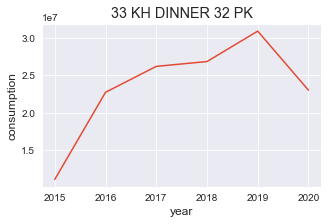

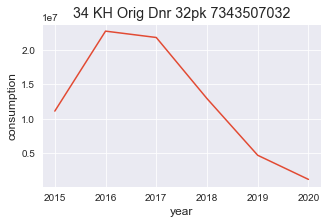

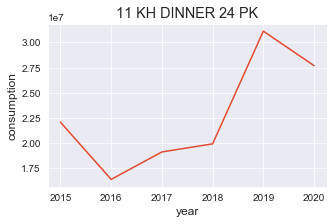

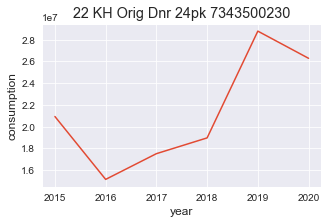

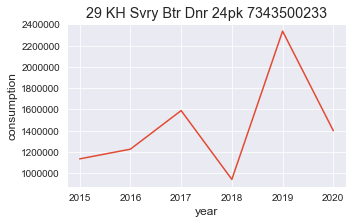

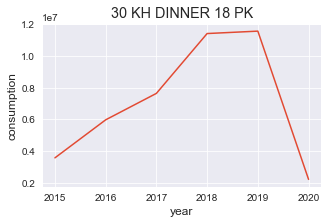

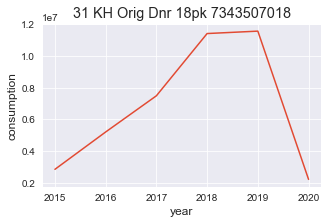

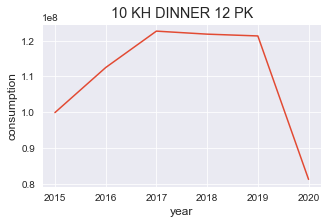

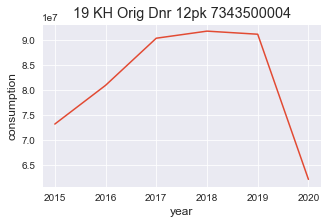

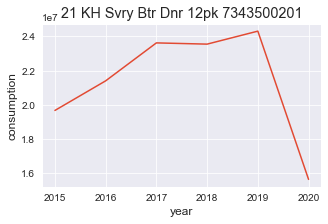

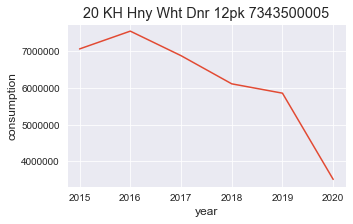

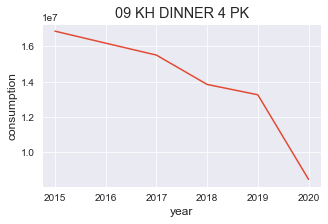

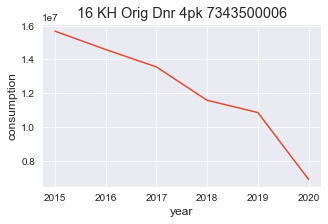

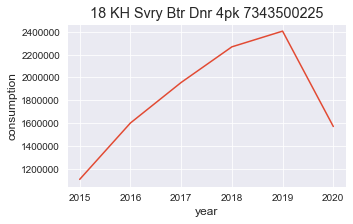

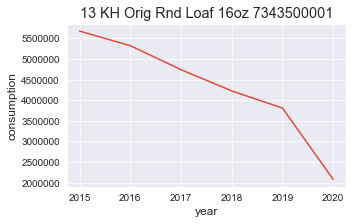

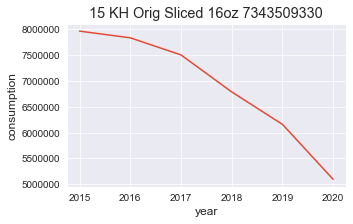

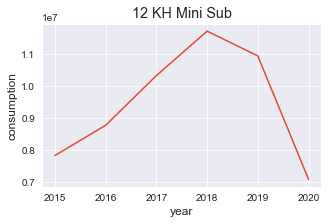

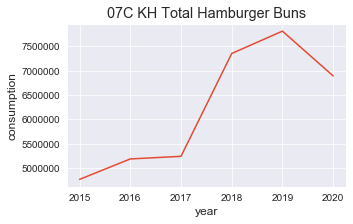

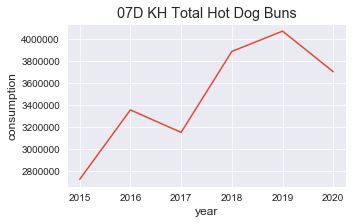

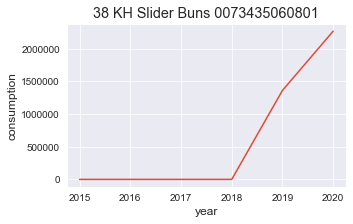

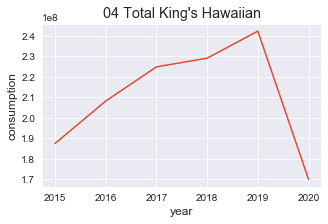

In [30]:
for product in product_list:
    plt.figure(figsize=(5,3))
    plt.plot(con.loc[(con['Product']==product)].groupby('year').agg({'consumption':'sum'}))
    plt.title(f'{product}')
    plt.xlabel('year')
    plt.ylabel('consumption')

### By product, by year (1-8 months)

Since we only have partial data of 2020 (before 9-13-2020), in order to compare the Consumption of 5 years without bias, I divided the data above and only chose those that come from **Month 1 to 8 (Jan to August)**. 

- There're several patterns throughout the first 8 months of 5 years for different products:
    - There is a spike in 2020: 
        - 33 KH DINNER **32 PK**
        - 11 KH DINNER **24 PK** and all of its branches (significant spike)
        - 10 KH DINNER **12 PK** and **some** of its branches (significant spike)
        - 15 KH Orig **Sliced** 16oz 7343509330 (significant spike after several years' going down)
        - 07C KH Total **Hamburger Buns**
        - 07D KH Total **Hot Dog Buns**
        - 38 KH **Slider Buns** 0073435060801
        - 04 **Total** King's Hawaiian
    - There is a significant drop in 2020:
        - 30 KH DINNER **18 PK** and all of its branches
        - 12 KH **Mini Sub**
    - Continued to go down since 2015:
        - 09 KH DINNER **4 PK** and **some** of its branches
        - 13 KH Orig **Rnd Loaf** 16oz 7343500001

/Users/kpainton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


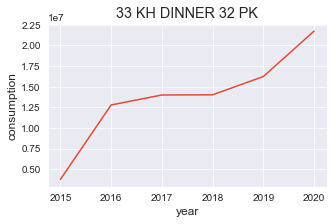

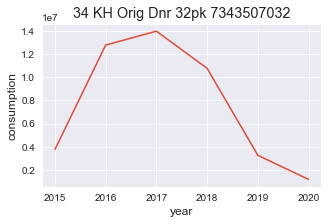

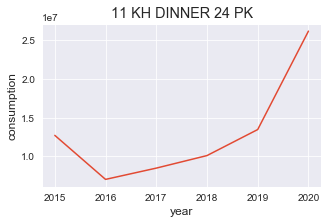

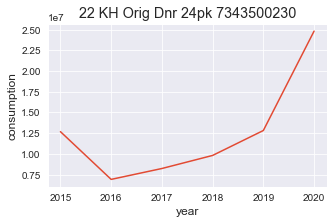

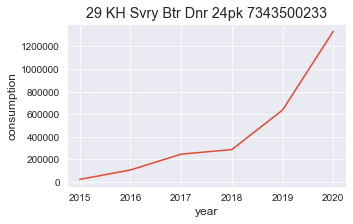

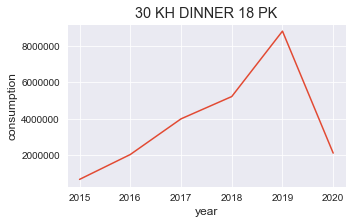

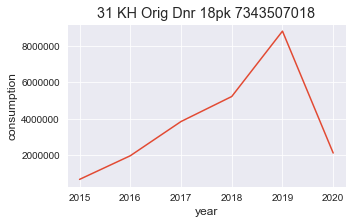

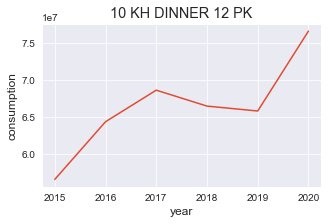

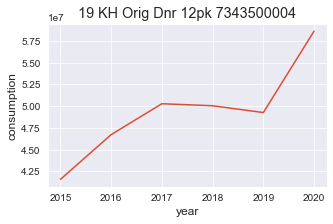

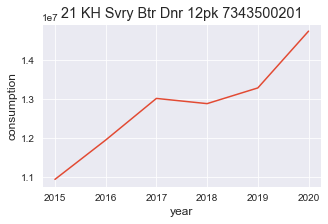

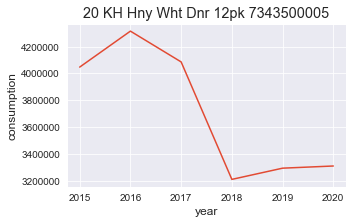

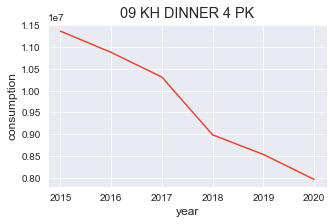

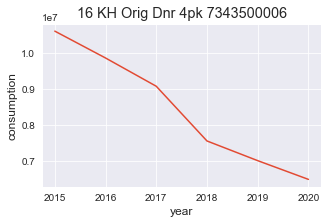

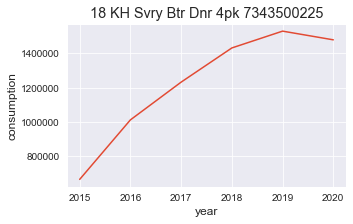

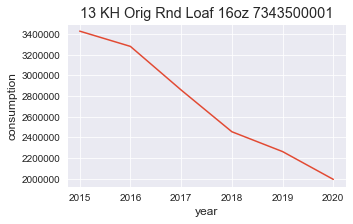

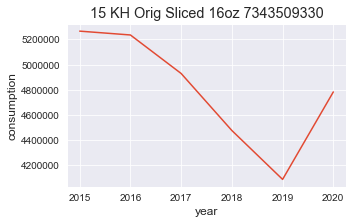

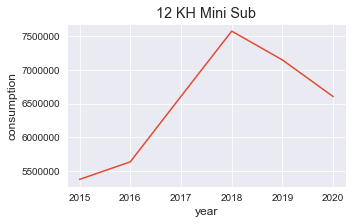

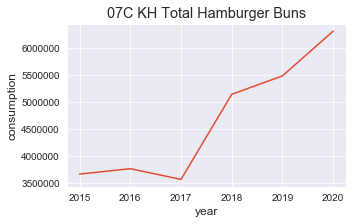

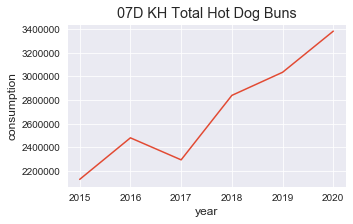

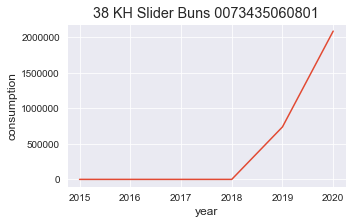

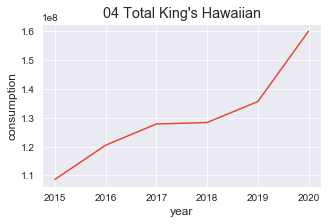

In [31]:
for product in product_list:
    plt.figure(figsize=(5,3))
    plt.plot(con.loc[(con['Product']==product)&(con['month'].isin([1,2,3,4,5,6,7,8]))].groupby('year').agg({'consumption':'sum'}))
    plt.title(f'{product}')
    plt.xlabel('year')
    plt.ylabel('consumption')

### By product, by year_month

If we want to explore more deeply **(by every month)**, the following plot shows us that some specific months always have a high Consumption or low ACV.

- November and December have a peak of Consumption, (and April (or around) has a small peak of Consumption, not always):
    - 33 KH DINNER **32 PK** and all of its branches
    - 11 KH DINNER **24 PK** and all of its branches
    - 30 KH DINNER **18 PK** and all of its branches
    - 10 KH DINNER **12 PK** and all of its branches
- There is a peak every quarter:
    - 09 KH DINNER **4 PK** and all of its branches
    - 15 KH Orig **Sliced** 16oz 7343509330
    - 12 KH **Mini Sub**
    - 38 KH **Slider Buns** 0073435060801
- There is a peak every quarter, and November/December got the highest:
    - 13 KH Orig **Rnd Loaf** 16oz 7343500001
    - 04 Total King's Hawaiian
- There is a peak in summer and a valley in winter every year:
    - 07C KH Total **Hamburger Buns**
    - 07D KH Total **Hot Dog Buns**

/Users/kpainton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


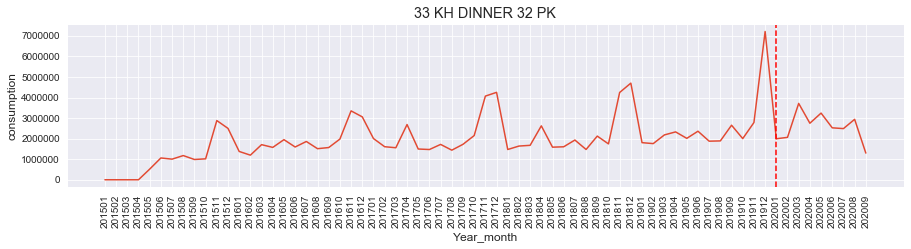

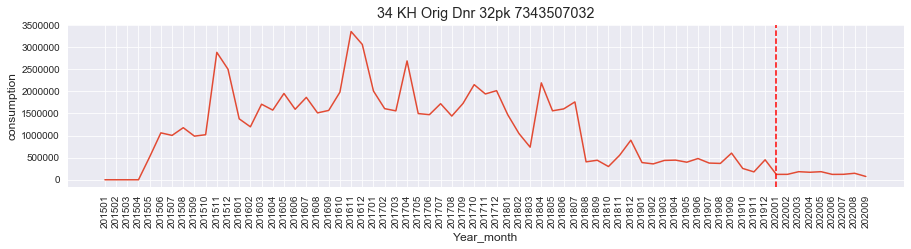

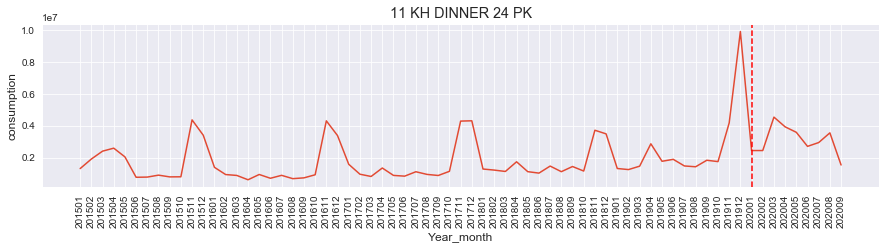

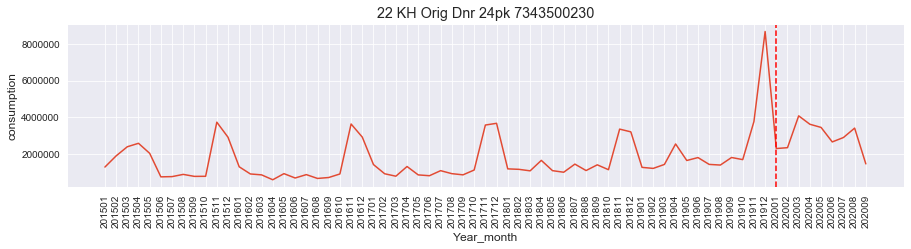

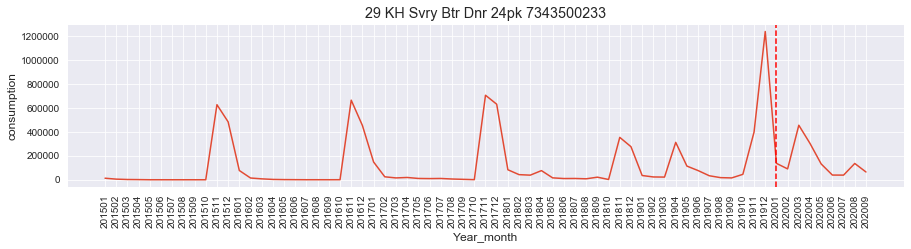

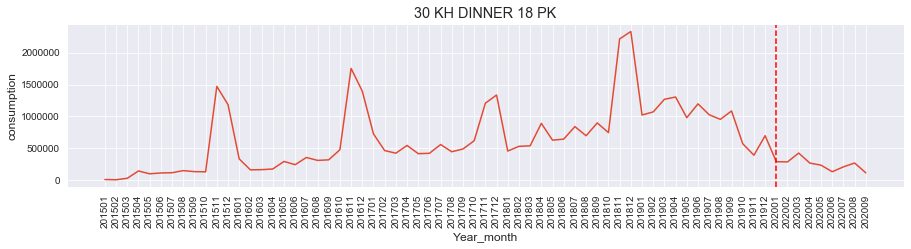

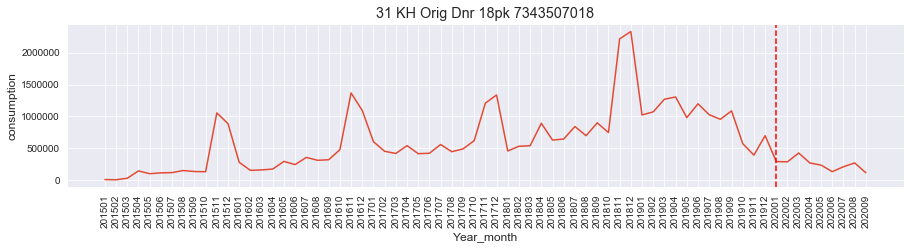

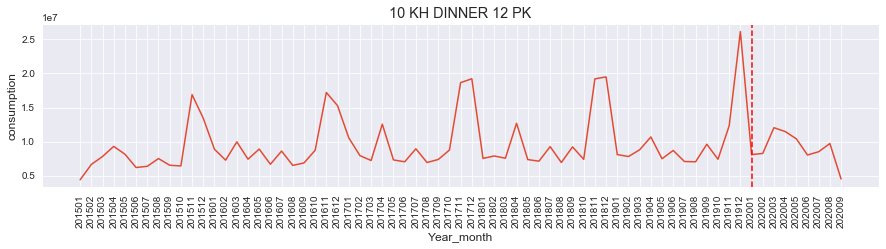

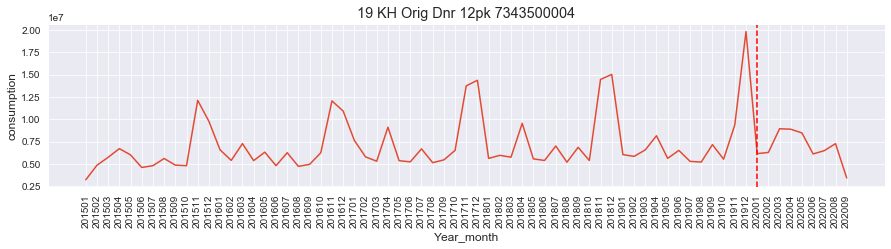

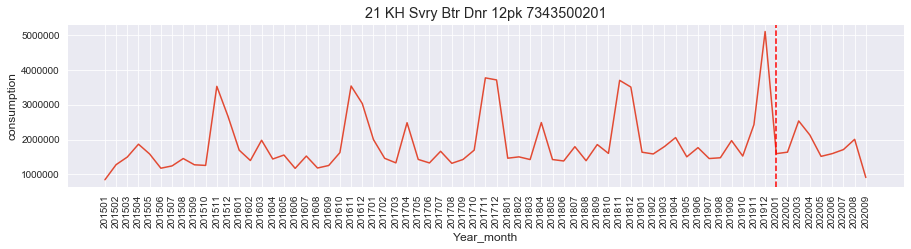

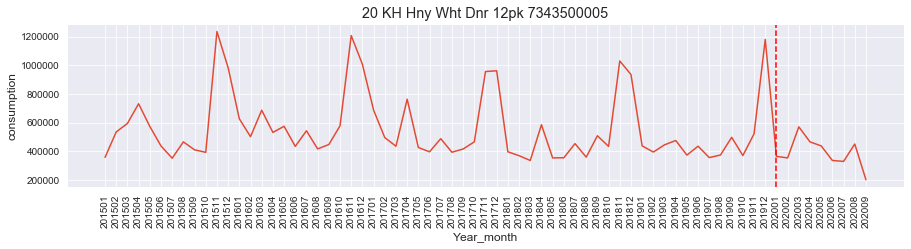

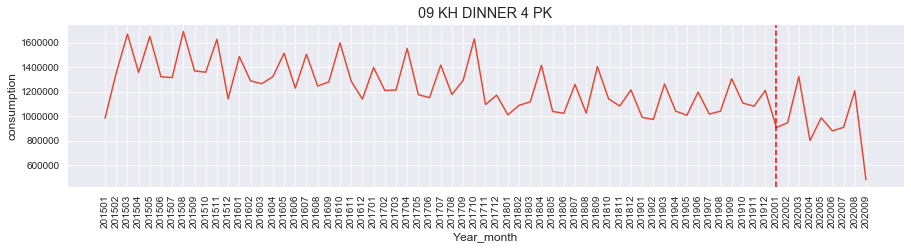

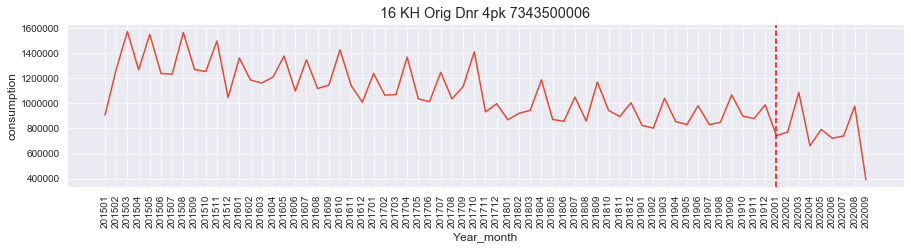

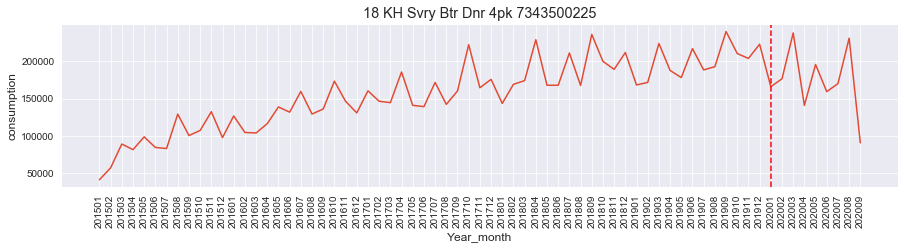

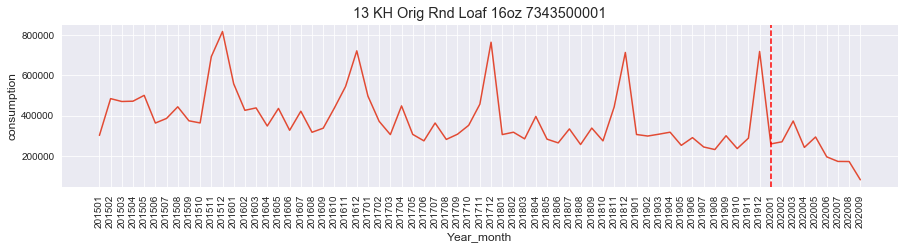

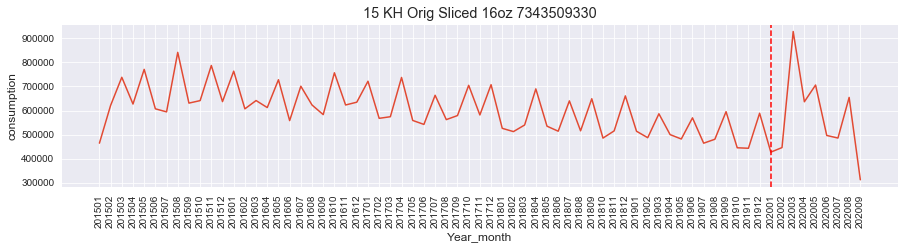

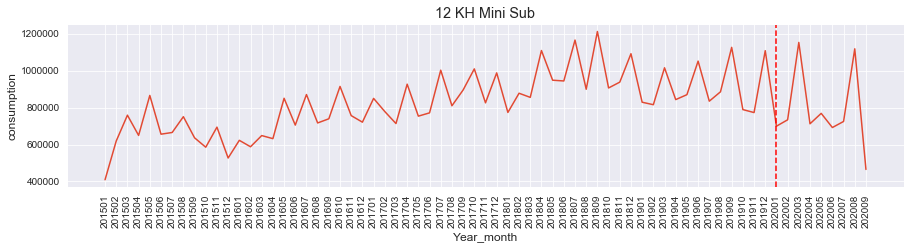

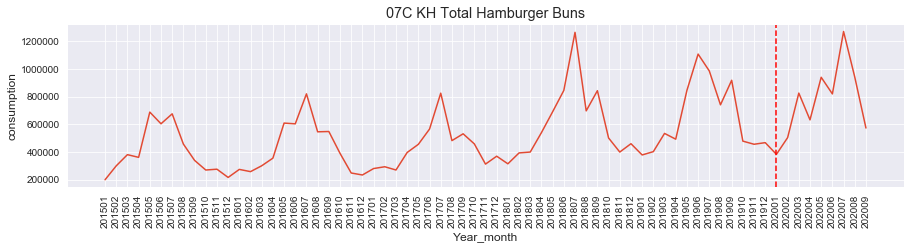

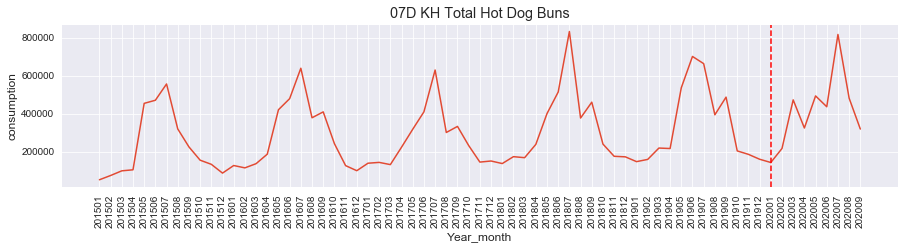

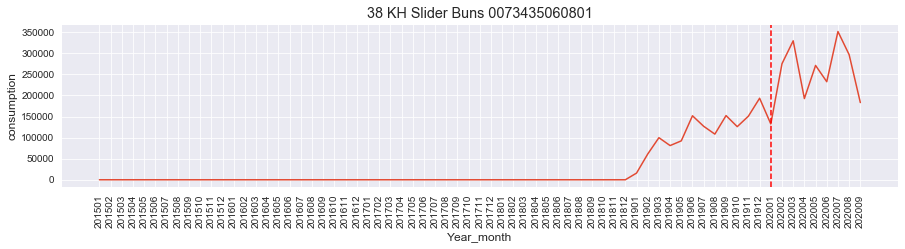

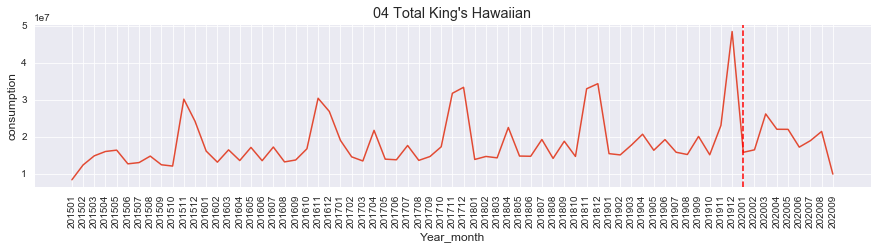

In [32]:
con['Year_month'] = con.Date.map(lambda x: 100*x.year + x.month).astype(str)
for product in product_list:
    plt.figure(figsize=(15,3))
    plt.plot(con.loc[(con['Product']==product)].groupby('Year_month').agg({'consumption':'sum'}))
    plt.title(f'{product}')
    plt.xlabel('Year_month')
    plt.ylabel('consumption')
    plt.xticks(rotation = 90)
    plt.axvline(x = '202001',color = 'red', linestyle='--')

Text(0, 0.5, 'consumption')

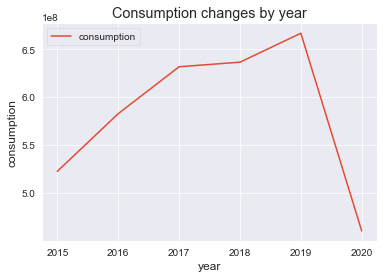

In [33]:
## How does total Consumption change by year?
con.groupby('year').agg({'consumption':'sum'}).plot()
plt.title('Consumption changes by year')
plt.xlabel('year')
plt.ylabel('consumption')

Text(0, 0.5, 'consumption')

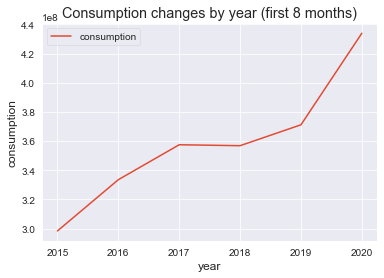

In [34]:
con.loc[con['month'].isin([1,2,3,4,5,6,7,8])].groupby('year').agg({'consumption':'sum'}).plot()
plt.title('Consumption changes by year (first 8 months)')
plt.xlabel('year')
plt.ylabel('consumption')

## How does Consumption change by state by year

Different states have different trends, as a whole, there is a significant spike from 2015 to 2017 and 2019 to 2020, but a sligtly growth  from 2017 to 2019:

- Continued to **increase** from 2015 to 2020:
    - NY
    - MD/Washington D.C.
    - MA
    - IA
    - WI
    - PA 
    - CT/ MA 
    - FL
    - AR
    - MN
    - NE
    - AZ
    - RI
    - UT
- An overall rise in ACV, but has some **stagnation** of rising in some peroids: **Could link the difference with other files to find the reason**
    - GA: 2017-2018 stagnation of rising, 2018-2019 slightly rising
    - CO: 2017-2019 stagnation of rising
    - MI: 2018-2019 stagnation of rising
    - KS: 2017-2019 slightly rising
    - TN: 2016-2017, 2018-2019 slightly rising, 2017-2018 stagnation of rising
    - KY: 2017-2019 stagnation of rising
    - New England: 2017-2018 stagnation of rising
    - OK: 2016-2018 stagnation of rising, 2018-2019 slightly rising
- Has some **going downs** in some peroids: **Could link the difference with other files to find the reason**
    - AL: 2017-2018 slightly went down, 2018-2019 slightly rising
    - ID: 2017-2018 went down, 2018-2019 slightly rising
    - NC: 2017-2018 slightly went down, 2018-2019 slightly rising
    - IL: 2016-2017 stagnation of rising, 2017-2019 went down
    - TX: 2017-2019 went down
    - IN: 2016-2018 went down
    - NV: 2015-2016, 2017-2018 steady, 2016-2017, 2018-2019 went down
    - CA: 2017-2018 went down, 2018-2019 steady
    - Mississippi: 2016-2018 went down, 2018-2019 slightly rising
    - LA/AL: 2016-2017 stagnation of rising, 2017-2018 went down
    - OR: 2017-2018 slightly rising, 2018-2019 went down
    - VA: 2017-2018 went down, 2018-2019 slightly rising
    - WA: 2017-2019 went down
    - South Carolina: 2017-2018 slightly went down, 2018-2019 slightly went up
    - MO: 2017-2018 slightly went down, 2018-2019 slightly went up
    - West Texas/New Mexico: 2017-2018 significantly went down

# Document 4 EDA

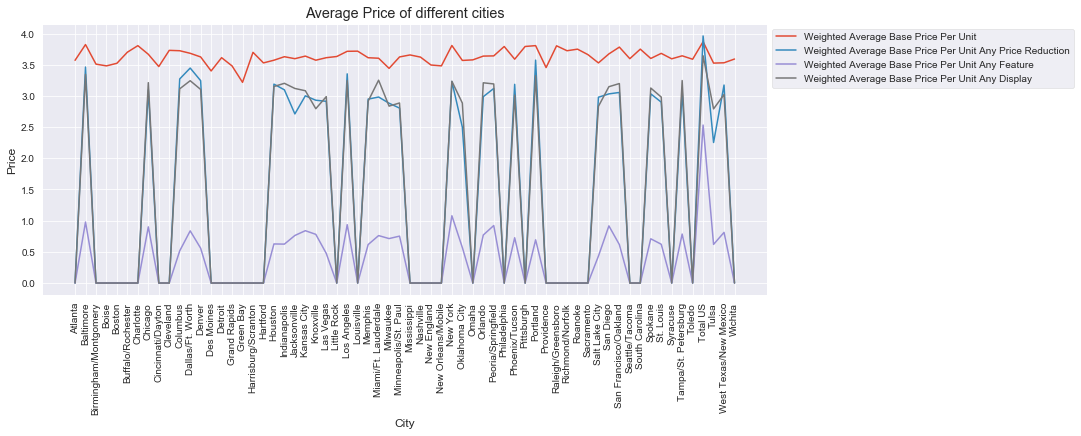

In [35]:
melt_data = pd.read_csv('DATA/4.Cleaned_Data_Oct26_separate_prices.csv')
mydata = melt_data.fillna(0)
plt.figure(figsize=(13,5))
geo_price = mydata.groupby(['City']).agg({'Weighted Average Base Price Per Unit':'mean',
                                          'Weighted Average Base Price Per Unit Any Price Reduction':'mean',
                                         'Weighted Average Base Price Per Unit Any Feature':'mean',
                                        'Weighted Average Base Price Per Unit Any Display':'mean'
                                         })[1:]

plt.xticks(rotation=90) 
plt.plot(geo_price['Weighted Average Base Price Per Unit'], Label = 'Weighted Average Base Price Per Unit' )
plt.plot(geo_price['Weighted Average Base Price Per Unit Any Price Reduction'], Label = 'Weighted Average Base Price Per Unit Any Price Reduction' )
plt.plot(geo_price['Weighted Average Base Price Per Unit Any Feature'], Label = 'Weighted Average Base Price Per Unit Any Feature' )
plt.plot(geo_price['Weighted Average Base Price Per Unit Any Display'], Label = 'Weighted Average Base Price Per Unit Any Display' )
plt.title('Average Price of different cities')
plt.xlabel('City')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1, 1))



In [36]:
mydata.groupby(['Year','Week']).agg({'Weighted Average Base Price Per Unit':'mean',
                                          'Weighted Average Base Price Per Unit Any Price Reduction':'mean',
                                         'Weighted Average Base Price Per Unit Any Feature':'mean',
                                        'Weighted Average Base Price Per Unit Any Display':'mean'
                                         })[1:]

Weighted Average Base Price Per Unit  \
Year Week                                         
2015 3                                     2.46   
     4                                     2.46   
     5                                     2.50   
     6                                     2.46   
     7                                     2.43   
...                                         ...   
2020 33                                    3.88   
     34                                    3.87   
     35                                    3.90   
     36                                    3.92   
     37                                    3.90   

           Weighted Average Base Price Per Unit Any Price Reduction  \
Year Week                                                             
2015 3                                                  1.05          
     4                                                  1.06          
     5                                                  1.07          
     6                                                  1.05          
     7                                                  1.00          
...                                                      ...          
2020 33                                                 1.56          
     34                                                 1.53          
     35                                                 1.69          
     36                                                 1.71          
     37                                                 1.66          

           Weighted Average Base Price Per Unit Any Feature  \
Year Week                                                     
2015 3                                                 0.27   
     4                                                 0.19   
     5                                                 0.37   
     6                                                 0.14   
     7                                                 0.16   
...                                                     ...   
2020 33                                                0.36   
     34                                                0.22   
     35                                                0.41   
     36                                                1.27   
     37                                                0.41   

           Weighted Average Base Price Per Unit Any Display  
Year Week                                                    
2015 3                                                 1.12  
     4                                                 1.11  
     5                                                 1.11  
     6                                                 1.10  
     7                                                 1.11  
...                                                     ...  
2020 33                                                1.70  
     34                                                1.74  
     35                                                1.76  
     36                                                1.79  
     37                                                1.77  

[295 rows x 4 columns]

In [37]:
mydata.groupby(['City','Product']).agg({'Weighted Average Base Price Per Unit':'mean',
                                          'Weighted Average Base Price Per Unit Any Price Reduction':'mean',
                                         'Weighted Average Base Price Per Unit Any Feature':'mean',
                                        'Weighted Average Base Price Per Unit Any Display':'mean'
                                         })[1:]

Weighted Average Base Price Per Unit  \
City    Product                                                                 
Albany  07C KH Total Hamburger Buns                                      3.51   
        07D KH Total Hot Dog Buns                                        3.46   
        09 KH DINNER 4 PK                                                1.54   
        10 KH DINNER 12 PK                                               3.63   
        11 KH DINNER 24 PK                                               5.61   
...                                                                       ...   
Wichita 30 KH DINNER 18 PK                                               4.15   
        31 KH Orig Dnr 18pk 7343507018                                   4.15   
        33 KH DINNER 32 PK                                               5.40   
        34 KH Orig Dnr 32pk 7343507032                                   3.29   
        38 KH Slider Buns 0073435060801                                  1.20   

                                         Weighted Average Base Price Per Unit Any Price Reduction  \
City    Product                                                                                     
Albany  07C KH Total Hamburger Buns                                                   2.60          
        07D KH Total Hot Dog Buns                                                     1.88          
        09 KH DINNER 4 PK                                                             1.11          
        10 KH DINNER 12 PK                                                            3.47          
        11 KH DINNER 24 PK                                                            3.98          
...                                                                                    ...          
Wichita 30 KH DINNER 18 PK                                                            0.00          
        31 KH Orig Dnr 18pk 7343507018                                                0.00          
        33 KH DINNER 32 PK                                                            0.00          
        34 KH Orig Dnr 32pk 7343507032                                                0.00          
        38 KH Slider Buns 0073435060801                                               0.00          

                                         Weighted Average Base Price Per Unit Any Feature  \
City    Product                                                                             
Albany  07C KH Total Hamburger Buns                                                  0.54   
        07D KH Total Hot Dog Buns                                                    0.58   
        09 KH DINNER 4 PK                                                            0.06   
        10 KH DINNER 12 PK                                                           1.06   
        11 KH DINNER 24 PK                                                           0.45   
...                                                                                   ...   
Wichita 30 KH DINNER 18 PK                                                           0.00   
        31 KH Orig Dnr 18pk 7343507018                                               0.00   
        33 KH DINNER 32 PK                                                           0.00   
        34 KH Orig Dnr 32pk 7343507032                                               0.00   
        38 KH Slider Buns 0073435060801                                              0.00   

                                         Weighted Average Base Price Per Unit Any Display  
City    Product                                                                            
Albany  07C KH Total Hamburger Buns                                                  2.97  
        07D KH Total Hot Dog Buns                                                    2.13  
        09 KH DINNER 4 PK                                                            1.48  
   

In [38]:
mydata.groupby('Product').agg({'Weighted Average Base Price Per Unit':'mean',
                                          'Weighted Average Base Price Per Unit Any Price Reduction':'mean',
                                         'Weighted Average Base Price Per Unit Any Feature':'mean',
                                        'Weighted Average Base Price Per Unit Any Display':'mean'
                                         })[1:]

,Weighted Average Base Price Per Unit,Weighted Average Base Price Per Unit Any Price Reduction,Weighted Average Base Price Per Unit Any Feature,Weighted Average Base Price Per Unit Any Display
Product,,,,
07C KH Total Hamburger Buns,3.69,1.72,0.44,1.72
07D KH Total Hot Dog Buns,3.66,1.64,0.47,1.73
09 KH DINNER 4 PK,1.55,0.75,0.11,0.74
10 KH DINNER 12 PK,3.69,1.85,0.93,1.75
11 KH DINNER 24 PK,6.06,2.76,0.42,2.81
12 KH Mini Sub,3.64,1.74,0.42,1.70
13 KH Orig Rnd Loaf 16oz 7343500001,4.32,2.07,0.21,1.94
15 KH Orig Sliced 16oz 7343509330,4.32,2.12,0.19,2.01
16 KH Orig Dnr 4pk 7343500006,1.54,0.73,0.11,0.74


# Document 14 EDA

In [39]:
data = pd.read_csv('DATA/14SalesByRetailLocation.csv', parse_dates = ['week_start', 'week_end'], index_col = 0)
data_sub = data.loc[data['year'] == 2020]
sales_by_product = data_sub.groupby(['year', 'month']).agg({'dollar_sales':'sum'}).reset_index()
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sales_by_product

,year,month,dollar_sales
0,2020,1,31597786.16304
1,2020,2,33266743.00472
2,2020,3,52225808.85801
3,2020,4,43413356.98002
4,2020,5,42530174.82432
5,2020,6,33715189.75138
6,2020,7,11457264.63088


In [40]:
data_sub = data.loc[data['year'] == 2018]
data_sub[data_sub['store'].str.contains("KR")].unit_sales.sum()
data_sub[data_sub['store'].str.contains("ABSCO")].unit_sales.sum()
remove = data_sub[~data_sub.store.str.contains("KR")]
remove = remove[~remove.store.str.contains("ABSCO")]
sales_by_product = remove.groupby(['store']).agg({'unit_sales':'sum'}).reset_index()
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sales_by_product = sales_by_product.append({'store':'KR', 'unit_sales':data_sub[data_sub['store'].str.contains("KR")].unit_sales.sum()}, ignore_index = True)
sales_by_product = sales_by_product.append({'store':'ABSCO', 'unit_sales':data_sub[data_sub['store'].str.contains("ABSCO")].unit_sales.sum()}, ignore_index = True)
sales_by_product['Percentage'] = (sales_by_product.unit_sales / sum(sales_by_product.unit_sales)) * 100
sales_by_product.sort_values('Percentage', ascending = False)

,store,unit_sales,Percentage
44,Walmart Corp,31032417.21131,23.37724
47,KR,28137346.97211,21.19633
48,ABSCO,15108401.09943,11.38141
28,Publix Corp,13790655.13399,10.38873
38,Target Corp,5782100.08982,4.35575
7,Associated Wholesale Grocers Total,5737729.66337,4.32233
0,ADUSA Food Lion Corp,5219134.25808,3.93166
25,Meijer Corp,2502311.68663,1.88503
22,Hy-Vee Corp,2263442.21667,1.70509
32,SEG Winn-Dixie Corp,2207329.66914,1.66282


In [41]:
sales_by_product = data.groupby(['retail_cover']).agg({'unit_sales':'mean',
                                                    'dollar_sales': 'mean'}).reset_index()
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sales_by_product['Percentage'] = (sales_by_product.unit_sales / sum(sales_by_product.unit_sales)) * 100
sales_by_product

,retail_cover,unit_sales,dollar_sales,Percentage
0,0.00000,4222.41568,14638.42012,70.92208
1,1.00000,1731.18219,5863.46033,29.07792


In [42]:
sales_by_product = data.groupby(['platform','retail_cover']).agg({'volume_sales':'mean'}).reset_index()
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sales_by_product['Percentage'] = (sales_by_product.volume_sales / sum(sales_by_product.volume_sales)) * 100
sales_by_product

,platform,retail_cover,volume_sales,Percentage
0,Dinner Rolls,0.00000,5034.09694,50.00128
1,Dinner Rolls,1.00000,1871.11672,18.58491
2,Round and Sliced,0.00000,983.10034,9.76467
3,Round and Sliced,1.00000,414.73390,4.11935
4,Sandwich,0.00000,1153.74709,11.45962
5,Sandwich,1.00000,611.14155,6.07018


In [43]:
data_sub = data.loc[data['year'] == 2020]
data_sub = data_sub.groupby('product').agg({'volume_sales':'sum',
                                         'volume_sales_merch':'sum',
                                         'volume_sales_price_reduce':'sum',
                                         'volume_sales_feature':'sum',
                                         'volume_sales_display':'sum'})
data_sub.div(data_sub.volume_sales, axis = 0) * 100

,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display
product,,,,,
KH 12 CT Butter,100.00000,37.95328,23.03766,12.78563,16.61020
KH 12 CT Original,100.00000,40.50883,24.89152,14.70381,17.33820
KH 12 CT Wheat,100.00000,37.55325,27.18071,9.15781,12.96170
KH 18 CT,100.00000,20.51938,3.36837,0.08416,17.87359
KH 24 CT Butter,100.00000,24.23919,19.18676,2.76293,7.80742
KH 24 CT Original,100.00000,19.02267,11.05292,2.27410,8.94799
KH 4 CT Butter,100.00000,41.11047,25.97430,2.72106,20.91888
KH 4 CT Original,100.00000,34.23907,16.06527,2.85740,22.04364
KH Hamburger Buns,100.00000,41.00633,32.99579,12.99874,11.33424


Enter a year2018


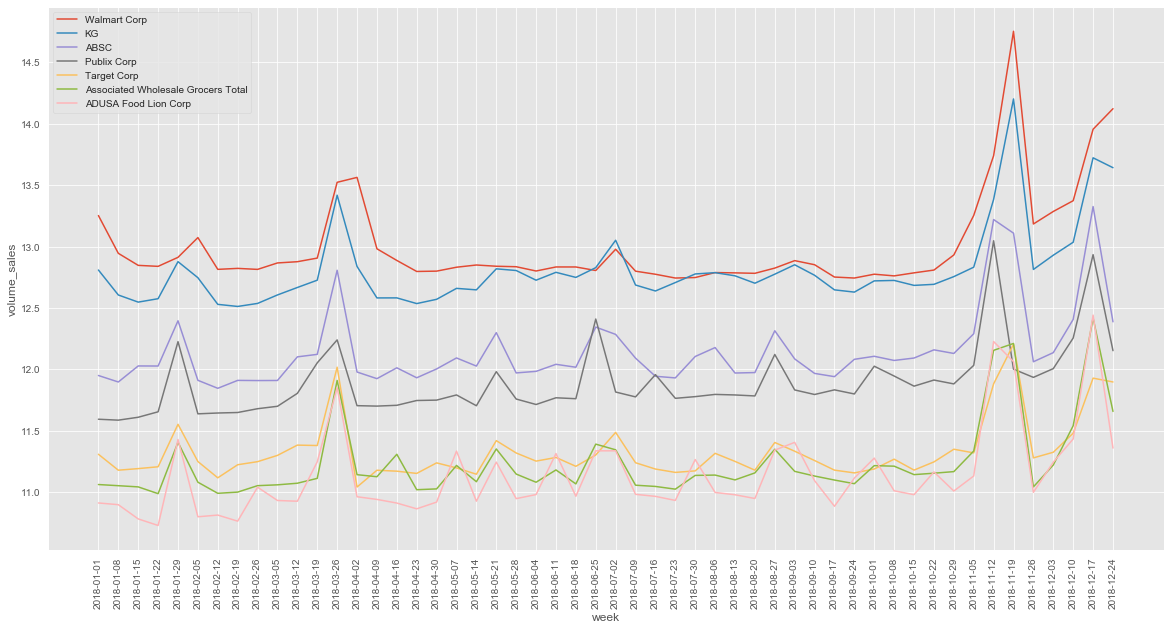

In [44]:
import numpy as np
year = int(input('Enter a year'))
data_sub = data.loc[data['year'] == year]
convert = list(data.loc[data['year'] == year, ['week_start']].groupby('week_start').groups.keys())
x_labels = [d.strftime('%Y-%m-%d') for d in convert]
data_sub = data_sub.groupby(['week', 'store']).agg({'volume_sales':'sum'}).reset_index()
for i in range(0, 52):
    subset = data_sub.loc[data_sub.week == i+1]
    kr_sum = subset[subset['store'].str.contains("KR")].volume_sales.sum()
    absco_sum = subset[subset['store'].str.contains("ABSCO")].volume_sales.sum()
    data_sub = data_sub.append({'week': i + 1, 'store': 'KG', 'volume_sales':kr_sum}, ignore_index = True)
    data_sub = data_sub.append({'week': i + 1, 'store': 'ABSC', 'volume_sales':absco_sum}, ignore_index = True)
data_sub = data_sub[~data_sub.store.str.contains("KR")]
data_sub = data_sub[~data_sub.store.str.contains("ABSCO")]
data_sub.volume_sales = np.log(data_sub.volume_sales + 1)
corps = ['Walmart Corp','KG','ABSC','Publix Corp','Target Corp','Associated Wholesale Grocers Total',
         'ADUSA Food Lion Corp']#,'Meijer Corp','Hy-Vee Corp','SEG Winn-Dixie Corp','Stater Bros Corp',
         #'Wakefern Corp','DeCA Total CONUS-RMA - Military']
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (20,10))
for i in corps: 
    data_subbb = data_sub.loc[data_sub.store == i]
    sns.lineplot(data = data_subbb,x = 'week', y = 'volume_sales', label = i, palette = sns.color_palette('tab20', n_colors=7))
ax.set_xticks(data_sub.week.unique())
plt.xticks(data_sub.week.unique(), x_labels)
plt.xticks(rotation = 90)
#plt.xlim((1,27))
#plt.ylim((10, 14))
ax.legend()
plt.show()

Enter a year2020


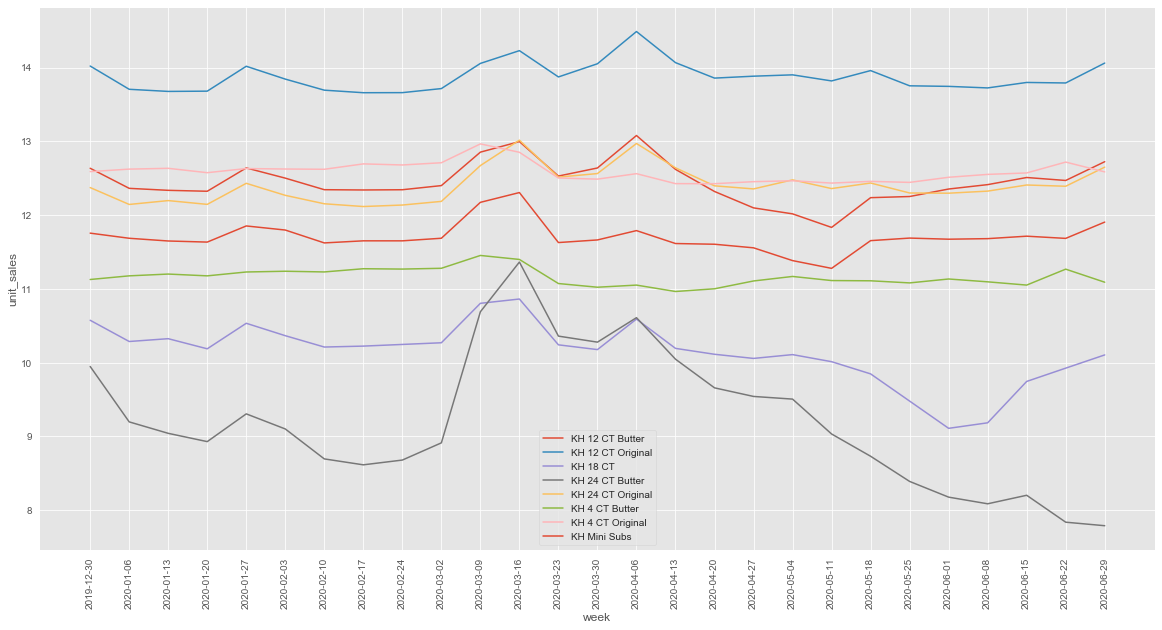

In [45]:
year = int(input('Enter a year'))
data_sub = data.loc[data['year'] == year]
convert = list(data.loc[data['year'] == year, ['week_start']].groupby('week_start').groups.keys())
x_labels = [d.strftime('%Y-%m-%d') for d in convert]
data_sub = data_sub.groupby(['week', 'product']).agg({'unit_sales':'sum'}).reset_index()
data_sub.unit_sales = np.log(data_sub.unit_sales + 1)
corps = ['KH 12 CT Butter', 'KH 12 CT Original', 
       'KH 18 CT', 'KH 24 CT Butter', 'KH 24 CT Original',
       'KH 4 CT Butter', 'KH 4 CT Original', 'KH Mini Subs']
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (20,10))
for i in corps: 
    data_subbb = data_sub.loc[data_sub['product'] == i]
    sns.lineplot(data = data_subbb,x = 'week', y = 'unit_sales', label = i, palette = sns.color_palette('Dark2', n_colors=7))
ax.set_xticks(data_sub.week.unique())
plt.xticks(data_sub.week.unique(), x_labels)
plt.xticks(rotation = 90)
#plt.xlim((1,27))
#plt.ylim((10, 14))
ax.legend()
plt.show()

In [46]:
data_sub = data.loc[data['year'] == 2020]
data_sub = data_sub.groupby(['holiday']).agg({'volume_sales':'mean',
                                                        'unit_sales': 'mean',
                                                        'dollar_sales': 'mean'})
data_sub.sort_values('volume_sales', ascending = False)

,volume_sales,unit_sales,dollar_sales
holiday,,,
July 4th,2344.76067,3047.92470,10506.55888
Easter Week,2335.98140,2922.98237,11027.40106
Christmas/NY,2139.22817,2765.34375,9820.93143
None,1947.82420,2537.25456,9383.51743
Memorial Week,1792.40561,2308.78698,8437.24479
Super Bowl,920.86616,1276.68180,4495.72441


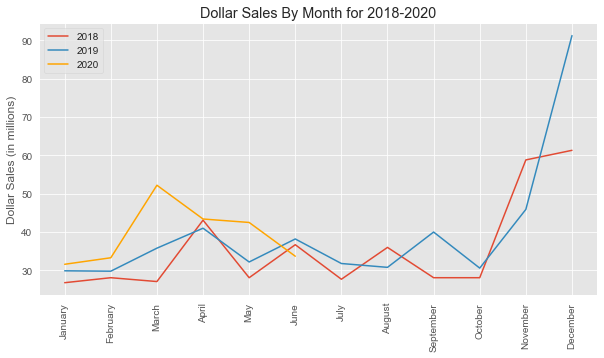

In [47]:
plt.figure(figsize = (10,5))
sns.lineplot(y = [26.8, 28.1, 27.1, 43.1, 28.1, 36.7, 27.7, 36. , 28.1, 28.1, 58.8,
       61.3] ,x = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'], sort = False, label = '2018');
sns.lineplot(y = [29.9, 29.8, 35.8, 41. , 32.2, 38.2, 31.8, 30.8, 40. , 30.6, 45.9,
       91.2] ,x = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'], sort = False, label = '2019');
sns.lineplot(y = [31.6, 33.3, 52.2, 43.4, 42.5, 33.7, None,  None,  None,  None,  None,
        None] ,x = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'], sort = False, label = '2020', 
        color = 'orange');
plt.xticks(rotation = 90);
plt.title('Dollar Sales By Month for 2018-2020');
plt.ylabel('Dollar Sales (in millions)');
plt.show()

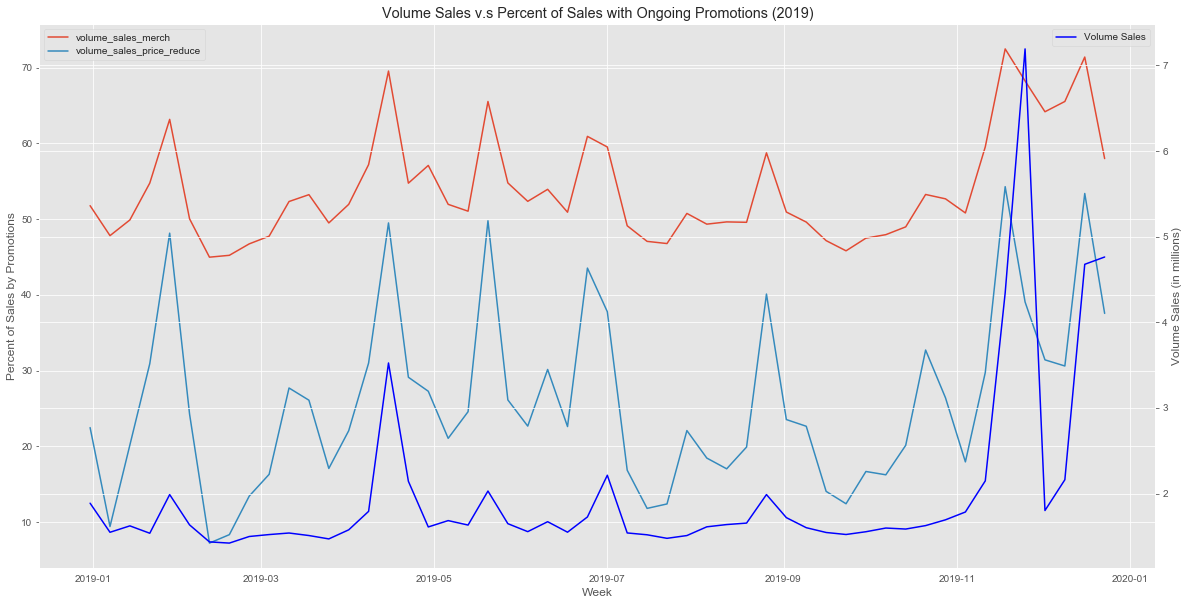

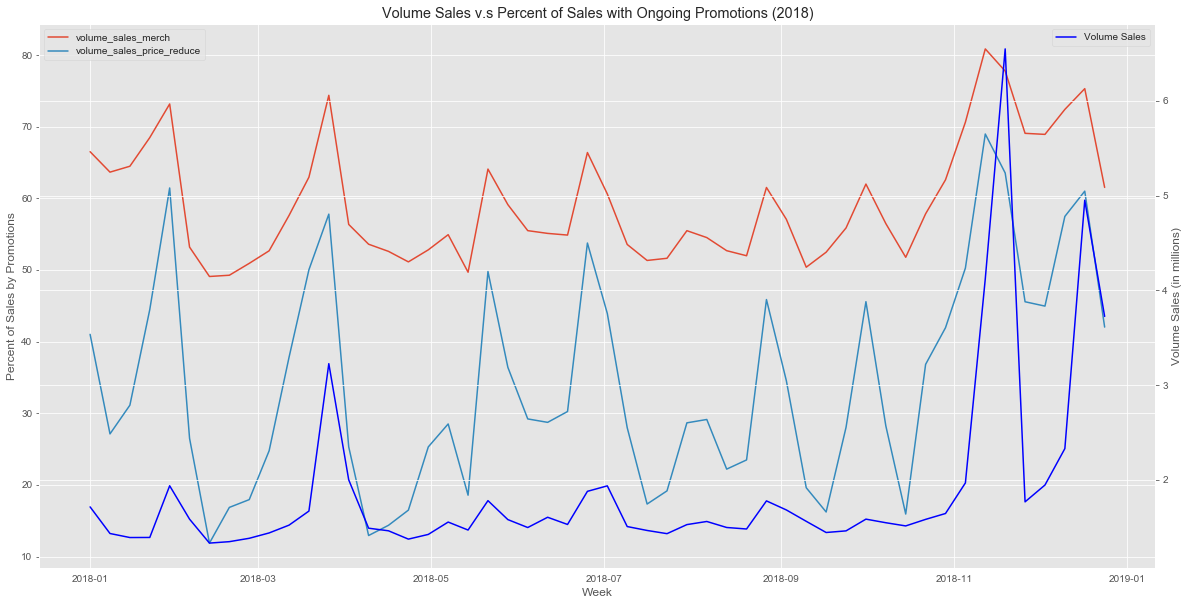

In [48]:
data = pd.read_csv('DATA/14SalesByRetailLocation.csv', parse_dates = ['week_start', 'week_end'], index_col = 0)
merch = data[['year', 'week_start', 'volume_sales', 'volume_sales_merch', 
      'volume_sales_price_reduce', 'volume_sales_feature', 
      'volume_sales_display']]
merch_2019 = merch.loc[merch['year'] == 2019].groupby('week_start').agg({'volume_sales': 'sum', 
                                                      'volume_sales_merch': 'sum', 
                                                      'volume_sales_price_reduce': 'sum', 
                                                      'volume_sales_feature': 'sum', 
                                                      'volume_sales_display': 'sum'})

merch_2019_volume = merch_2019.div(merch_2019.volume_sales, axis = 0) * 100
merch_2019_volume['volume_sales'] = merch_2019['volume_sales'] / 1000000
merch_2019_volume.reset_index(inplace = True)
fig, ax1 = plt.subplots(figsize = (20,10))
for i in ['volume_sales_merch', 'volume_sales_price_reduce']:
    sns.lineplot(x = merch_2019_volume.week_start, y = merch_2019_volume[i], label = i)

ax2 = ax1.twinx()

sns.lineplot(x = merch_2019_volume.week_start, y = merch_2019_volume.volume_sales, color = 'blue', label = 'Volume Sales')
ax1.set_xlabel('Week')
ax1.set_ylabel('Percent of Sales by Promotions')
ax2.set_ylabel('Volume Sales (in millions)')
plt.title('Volume Sales v.s Percent of Sales with Ongoing Promotions (2019)');
plt.show()
fig.savefig('Volume Sales v.s Percent of Sales with Ongoing Promotions (2019).png')

merch = data[['year', 'week_start', 'volume_sales', 'volume_sales_merch', 
      'volume_sales_price_reduce', 'volume_sales_feature', 
      'volume_sales_display']]
merch_2018 = merch.loc[merch['year'] == 2018].groupby('week_start').agg({'volume_sales': 'sum', 
                                                      'volume_sales_merch': 'sum', 
                                                      'volume_sales_price_reduce': 'sum', 
                                                      'volume_sales_feature': 'sum', 
                                                      'volume_sales_display': 'sum'})

merch_2018_volume = merch_2018.div(merch_2018.volume_sales, axis = 0) * 100
merch_2018_volume['volume_sales'] = merch_2018['volume_sales'] / 1000000
merch_2018_volume.reset_index(inplace = True)
fig, ax1 = plt.subplots(figsize = (20,10))
for i in ['volume_sales_merch', 'volume_sales_price_reduce']:
    sns.lineplot(x = merch_2018_volume.week_start, y = merch_2018_volume[i], label = i)

ax2 = ax1.twinx()

sns.lineplot(x = merch_2018_volume.week_start, y = merch_2018_volume.volume_sales, color = 'blue', label = 'Volume Sales')
ax1.set_xlabel('Week')
ax1.set_ylabel('Percent of Sales by Promotions')
ax2.set_ylabel('Volume Sales (in millions)')
plt.title('Volume Sales v.s Percent of Sales with Ongoing Promotions (2018)');
plt.show()
fig.savefig('Volume Sales v.s Percent of Sales with Ongoing Promotions (2018).png')